# Rancang Bangun Pengendali Otomatis Lingkungan Termal Berbasis Jaringan Saraf Tiruan

### Program Kecerdasan Buatan untuk membentuk model jaringan saraf tiruan dalam memenuhi Tugas Akhir program studi Teknik Fisika.
### Data di Bulan Maret 2019

In [1]:
# Mengimpor pustaka yang dibutuhkan.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
# Memasukkan dataset ke dalam jupyter.
data = pd.read_excel('Data/data3Sep.xlsx')

In [14]:
# Menampilkan 5 data teratas.
data.head(5)

,No,Variation,Month,Time,Heater,AC,DrybulbT,Radiation,AirT,RH
0,1,DT003,Sep,00:03:00,0,0,23.03,0.0,23.15,66.65
1,2,DT003,Sep,00:09:00,0,0,23.03,0.0,23.15,66.68
2,3,DT003,Sep,00:15:00,0,0,23.03,0.0,23.15,66.72
3,4,DT003,Sep,00:21:00,0,0,23.03,0.0,23.14,66.77
4,5,DT003,Sep,00:27:00,0,0,23.03,0.0,23.14,66.81


In [15]:
# Memisahkan data input dan data target.

# Data Input
X = data[['Heater','AC','DrybulbT','Radiation']]

# Data Target
target = data[['AirT','RH','No','Variation','Month','Time']]

In [16]:
# Memisahkan data pelatihan (training) dan data pengujian (testing).

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan 20% menjadi data tes
X_temp, X_test, y_temp, y_test = train_test_split(X, target, test_size=0.2, shuffle=True, random_state=15)

# Memisahkan 20% menjadi data validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False, random_state=2019)

In [17]:
# Menghapus data temporary
del X_temp, y_temp

# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(target)*100,2),
                                                       round(len(y_val)/len(target)*100,2),
                                                       round(len(y_test)/len(target)*100,2)))

train: 60.0% | validation: 20.0% | test 20.0%


In [18]:
# banyak data
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(3600, 4) (1200, 4) (1200, 4) (3600, 6) (1200, 6) (1200, 6)


## Model Tuning menggunakan Multi-Layer Perceptron Regressor

In [19]:
# Impor pustaka
from sklearn.neural_network import MLPRegressor

In [20]:
# # Mencari optimasi jumlah hidden layer dan neuron terbaik
# import operator

# def ann(m):
#     return MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(m), solver='adam', alpha=0.001, max_iter = 5000)

# daftar = {}
# for i in range(1,21):
#     model = ann(i)
#     model.fit(X_train, y_train[['AirT','RH']])
#     y_pred = model.predict(X_val)
#     rmse = mean_squared_error(y_val[['AirT','RH']], y_pred)**0.5
#     r2 = r2_score(y_val[['AirT','RH']], y_pred)
#     key = str(i)
#     value = str(rmse) + ',' + str(r2)
#     daftar[key] = rmse
#     print(i,': ','RMSE =',rmse,', R^2 =',r2)
#     if rmse < 4:
#         neuron = {i}
#         break
#     else:
#         neuron = min(daftar.items(), key=operator.itemgetter(1))[0]

# print(neuron, daftar) # 19 : RMSE 4.832 | R^2 = 0.52

In [21]:
# # Mencari optimasi jumlah hidden layer dan neuron terbaik
# import operator

# def ann(m,n):
#     return MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(m,n), solver='adam', alpha=0.001, max_iter = 5000)

# daftar = {}
# for i in range(1,21):
#     for j in range(1,21):
#         model = ann(i,j)
#         model.fit(X_train, y_train[['AirT','RH']])
#         y_pred = model.predict(X_val)
#         rmse = mean_squared_error(y_val[['AirT','RH']], y_pred)**0.5
#         r2 = r2_score(y_val[['AirT','RH']], y_pred)
#         key = str(i) + ',' + str(j)
#         value = str(rmse) + ',' + str(r2)
#         daftar[key] = rmse
#         print(i,j,': ','RMSE =',rmse,', R^2 =',r2)
#         if rmse < 4:
#             neuron = {i,j}
#             break
#         else:
#             neuron = min(daftar.items(), key=operator.itemgetter(1))[0]

# print(neuron, daftar)  # 5, 16 : RMSE = 4.596 | R^2 = 0.5439

In [22]:
# alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
# print('Semua error dalam nilai RMSE')
# print('-'*76)
# for alpha in alphas:
#     # Pembuatan model
#     # model_mlp = MLPRegressor(random_state=1, activation='relu', hidden_layer_sizes=(24,24,24), solver='adam')
#     model_mlp = MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(5, 16), solver='adam', 
#                              alpha=alpha, max_iter = 5000)

#     # Melakukan pelatihan (training) menggunakan 'fit'
#     model_mlp.fit(X_train, y_train[['AirT','RH']])

#     # Menghitung nilai RMSE
#     rmse_train = mean_squared_error(y_train[['AirT','RH']], model_mlp.predict(X_train))**0.5
#     rmse_validation = mean_squared_error(y_val[['AirT','RH']], model_mlp.predict(X_val))**0.5
#     rmse_test = mean_squared_error(y_test[['AirT','RH']], model_mlp.predict(X_test))**0.5

#     # print errors as report
#     print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
#           format(alpha,
#                  round(rmse_train,3),
#                  round(rmse_validation,3),
#                  round(rmse_test,3)))

In [23]:
# Model final
model_mlp = MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(5, 16), solver='adam', 
                             alpha=0.001, max_iter = 5000)

# Melakukan pelatihan (training) menggunakan 'fit'
model_mlp.fit(X_train, y_train[['AirT','RH']])

# Menghitung nilai RMSE
rmse_train = mean_squared_error(y_train[['AirT','RH']], model_mlp.predict(X_train))**0.5
rmse_validation = mean_squared_error(y_val[['AirT','RH']], model_mlp.predict(X_val))**0.5
y_pred = model_mlp.predict(X_test)
rmse_test = mean_squared_error(y_test[['AirT','RH']], y_pred)**0.5

# print errors as report
print('train error: {} | val error: {} | test error: {}'.
      format(round(rmse_train,3),
             round(rmse_validation,3),
             round(rmse_test,3)))
print('R^2 value: {}'.format(r2_score(y_test[['AirT','RH']], y_pred)))

train error: 4.632 | val error: 4.584 | test error: 4.682
R^2 value: 0.633684399505815


In [40]:
print(model_mlp.get_params)

<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 16), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)>


In [42]:
# Menambahkan fitur No Variation Month dan Time pada hasil prediksi
y_pred = pd.DataFrame(y_pred,    # values
             columns=['AirT','RH'])  # 1st row as the column names
y_pred[['No']] = y_test[['No']]
y_pred[['Variation']] = y_test[['Variation']]
y_pred[['Month']] = y_test[['Month']]
y_pred[['Time']] = y_test[['Time']]
y_pred.index = y_test.index
y_pred

,AirT,RH,No,Variation,Month,Time
812,20.750128,101.542753,813,DT013,Mar,09:15:00
1867,26.086078,92.799035,1868,DT029,Mar,18:45:00
4012,24.850179,89.647698,4013,DT065,Mar,17:15:00
4623,24.652932,98.103401,4624,DT077,Mar,06:21:00
5975,26.312368,101.974945,5976,DT097,Mar,21:33:00
...,...,...,...,...,...,...
5755,25.715077,100.263198,5756,DT093,Mar,23:33:00
2051,23.259114,96.808247,2052,DT033,Mar,13:09:00
1210,24.494955,91.869705,1211,DT021,Mar,01:03:00
673,25.706799,92.577509,674,DT009,Mar,19:21:00


## Visualisasi

In [43]:
# Variabel untuk pembuatan grafik

Heater    = X_test['Heater']
AC        = X_test['AC']
DrybulbT  = X_test['DrybulbT']
Radiation = X_test['Radiation']
AirT      = y_test['AirT']
RH        = y_test['RH']

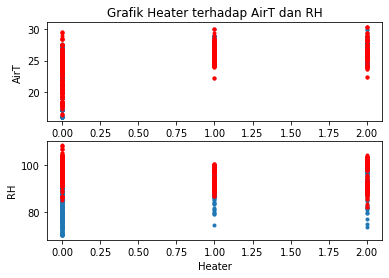

In [44]:
# plot a line, a perfit predict would all fall on this line
plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap AirT dan RH')
plt.plot(Heater, AirT, '.')
plt.plot(Heater, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(Heater, RH, '.')
plt.plot(Heater, y_pred.RH, 'r.')
plt.xlabel('Heater')
plt.ylabel('RH')

plt.show()

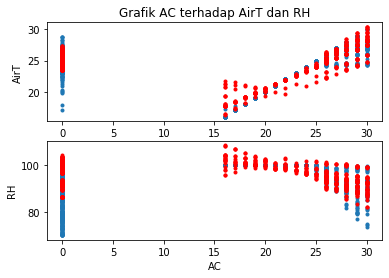

In [45]:
plt.subplot(2, 1, 1)
plt.title('Grafik AC terhadap AirT dan RH')
plt.plot(AC, AirT, '.')
plt.plot(AC, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(AC, RH, '.')
plt.plot(AC, y_pred.RH, 'r.')
plt.xlabel('AC')
plt.ylabel('RH')

plt.show()

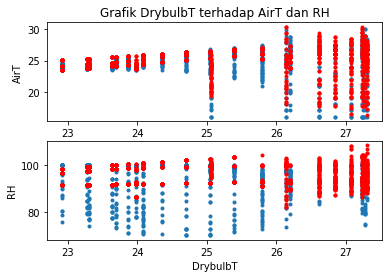

In [46]:
plt.subplot(2, 1, 1)
plt.title('Grafik DrybulbT terhadap AirT dan RH')
plt.plot(DrybulbT, AirT, '.')
plt.plot(DrybulbT, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(DrybulbT, RH, '.')
plt.plot(DrybulbT, y_pred.RH, 'r.')
plt.xlabel('DrybulbT')
plt.ylabel('RH')

plt.show()

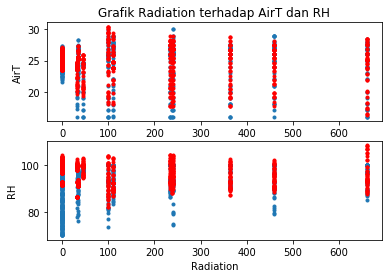

In [47]:
plt.subplot(2, 1, 1)
plt.title('Grafik Radiation terhadap AirT dan RH')
plt.plot(Radiation, AirT, '.')
plt.plot(Radiation, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(Radiation, RH, '.')
plt.plot(Radiation, y_pred.RH, 'r.')
plt.xlabel('Radiation')
plt.ylabel('RH')

plt.show()

## Visualisation in Time variance

Variasi: DT013


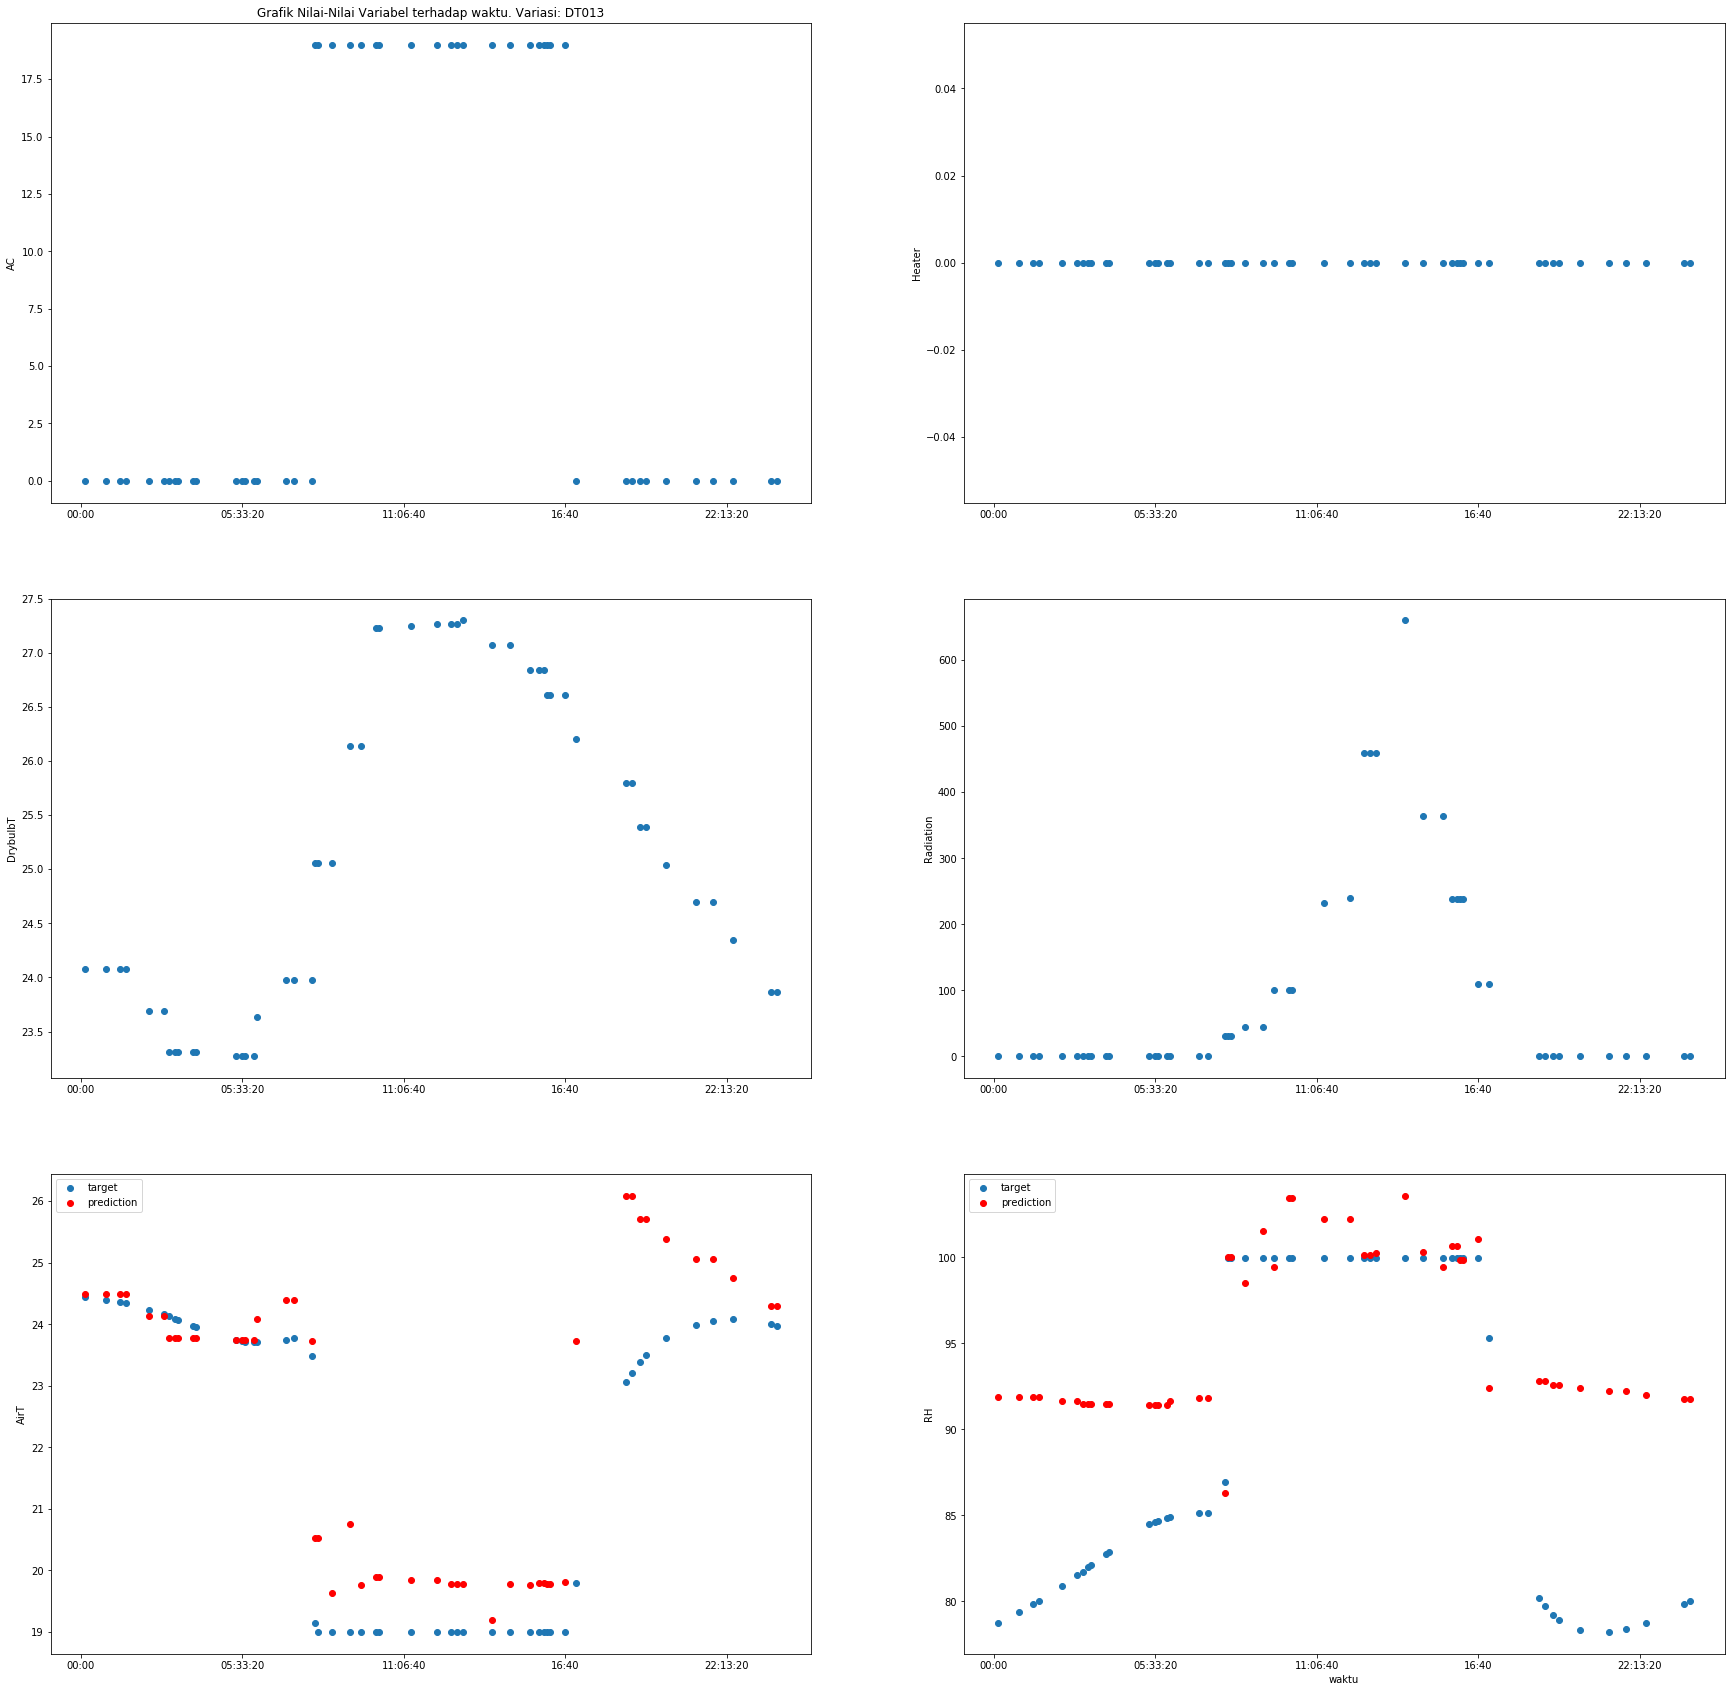

______________________________________________________________________________________________________________

Variasi: DT029


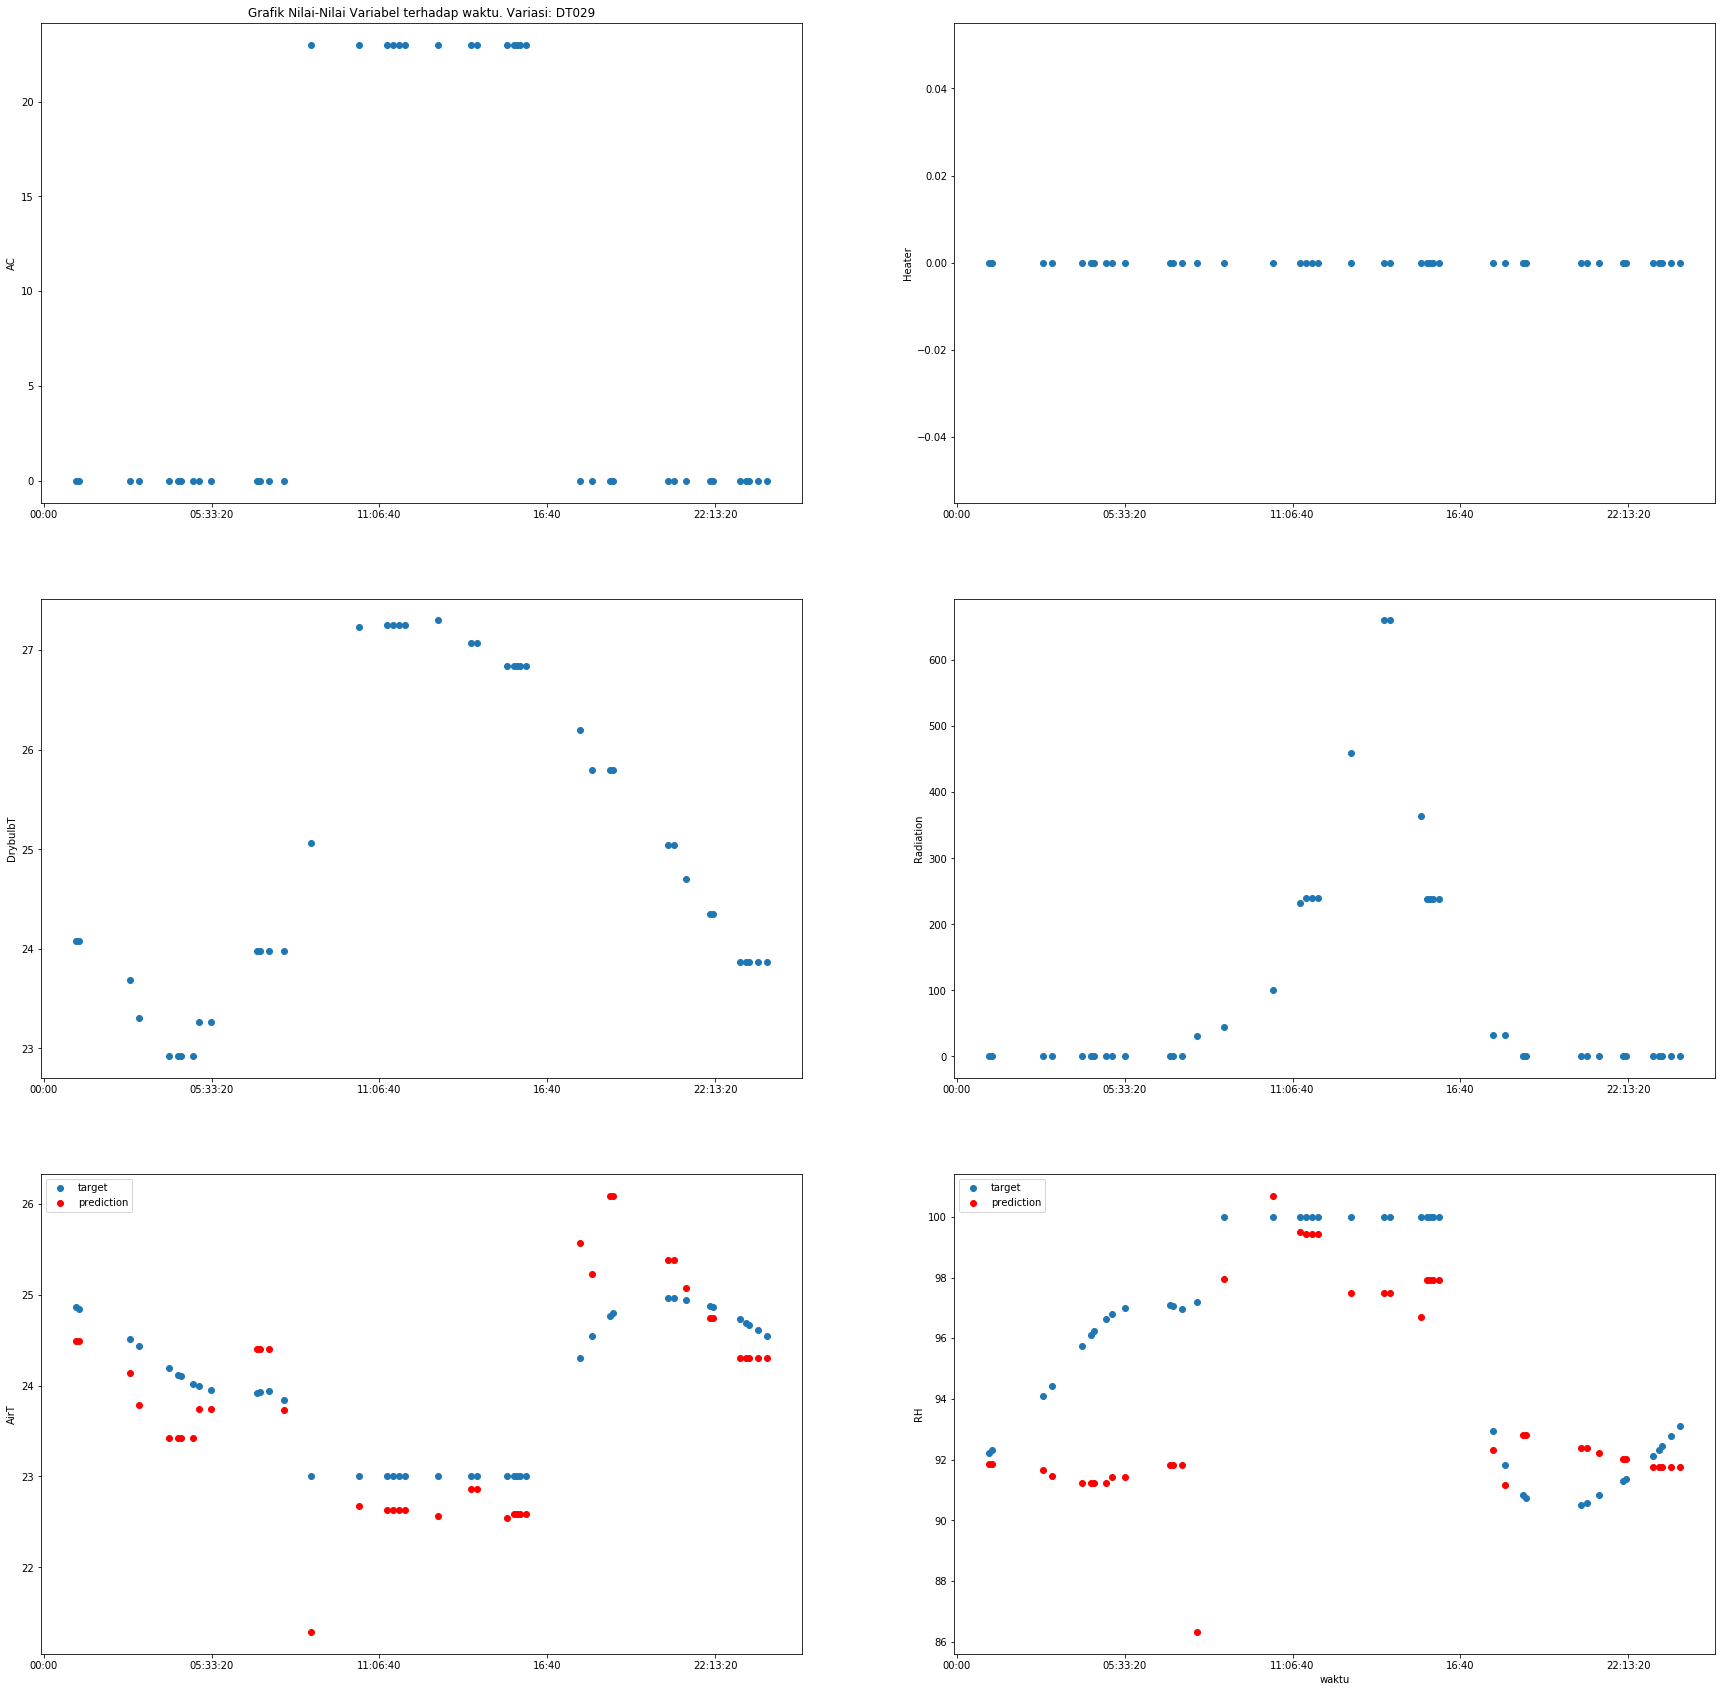

______________________________________________________________________________________________________________

Variasi: DT065


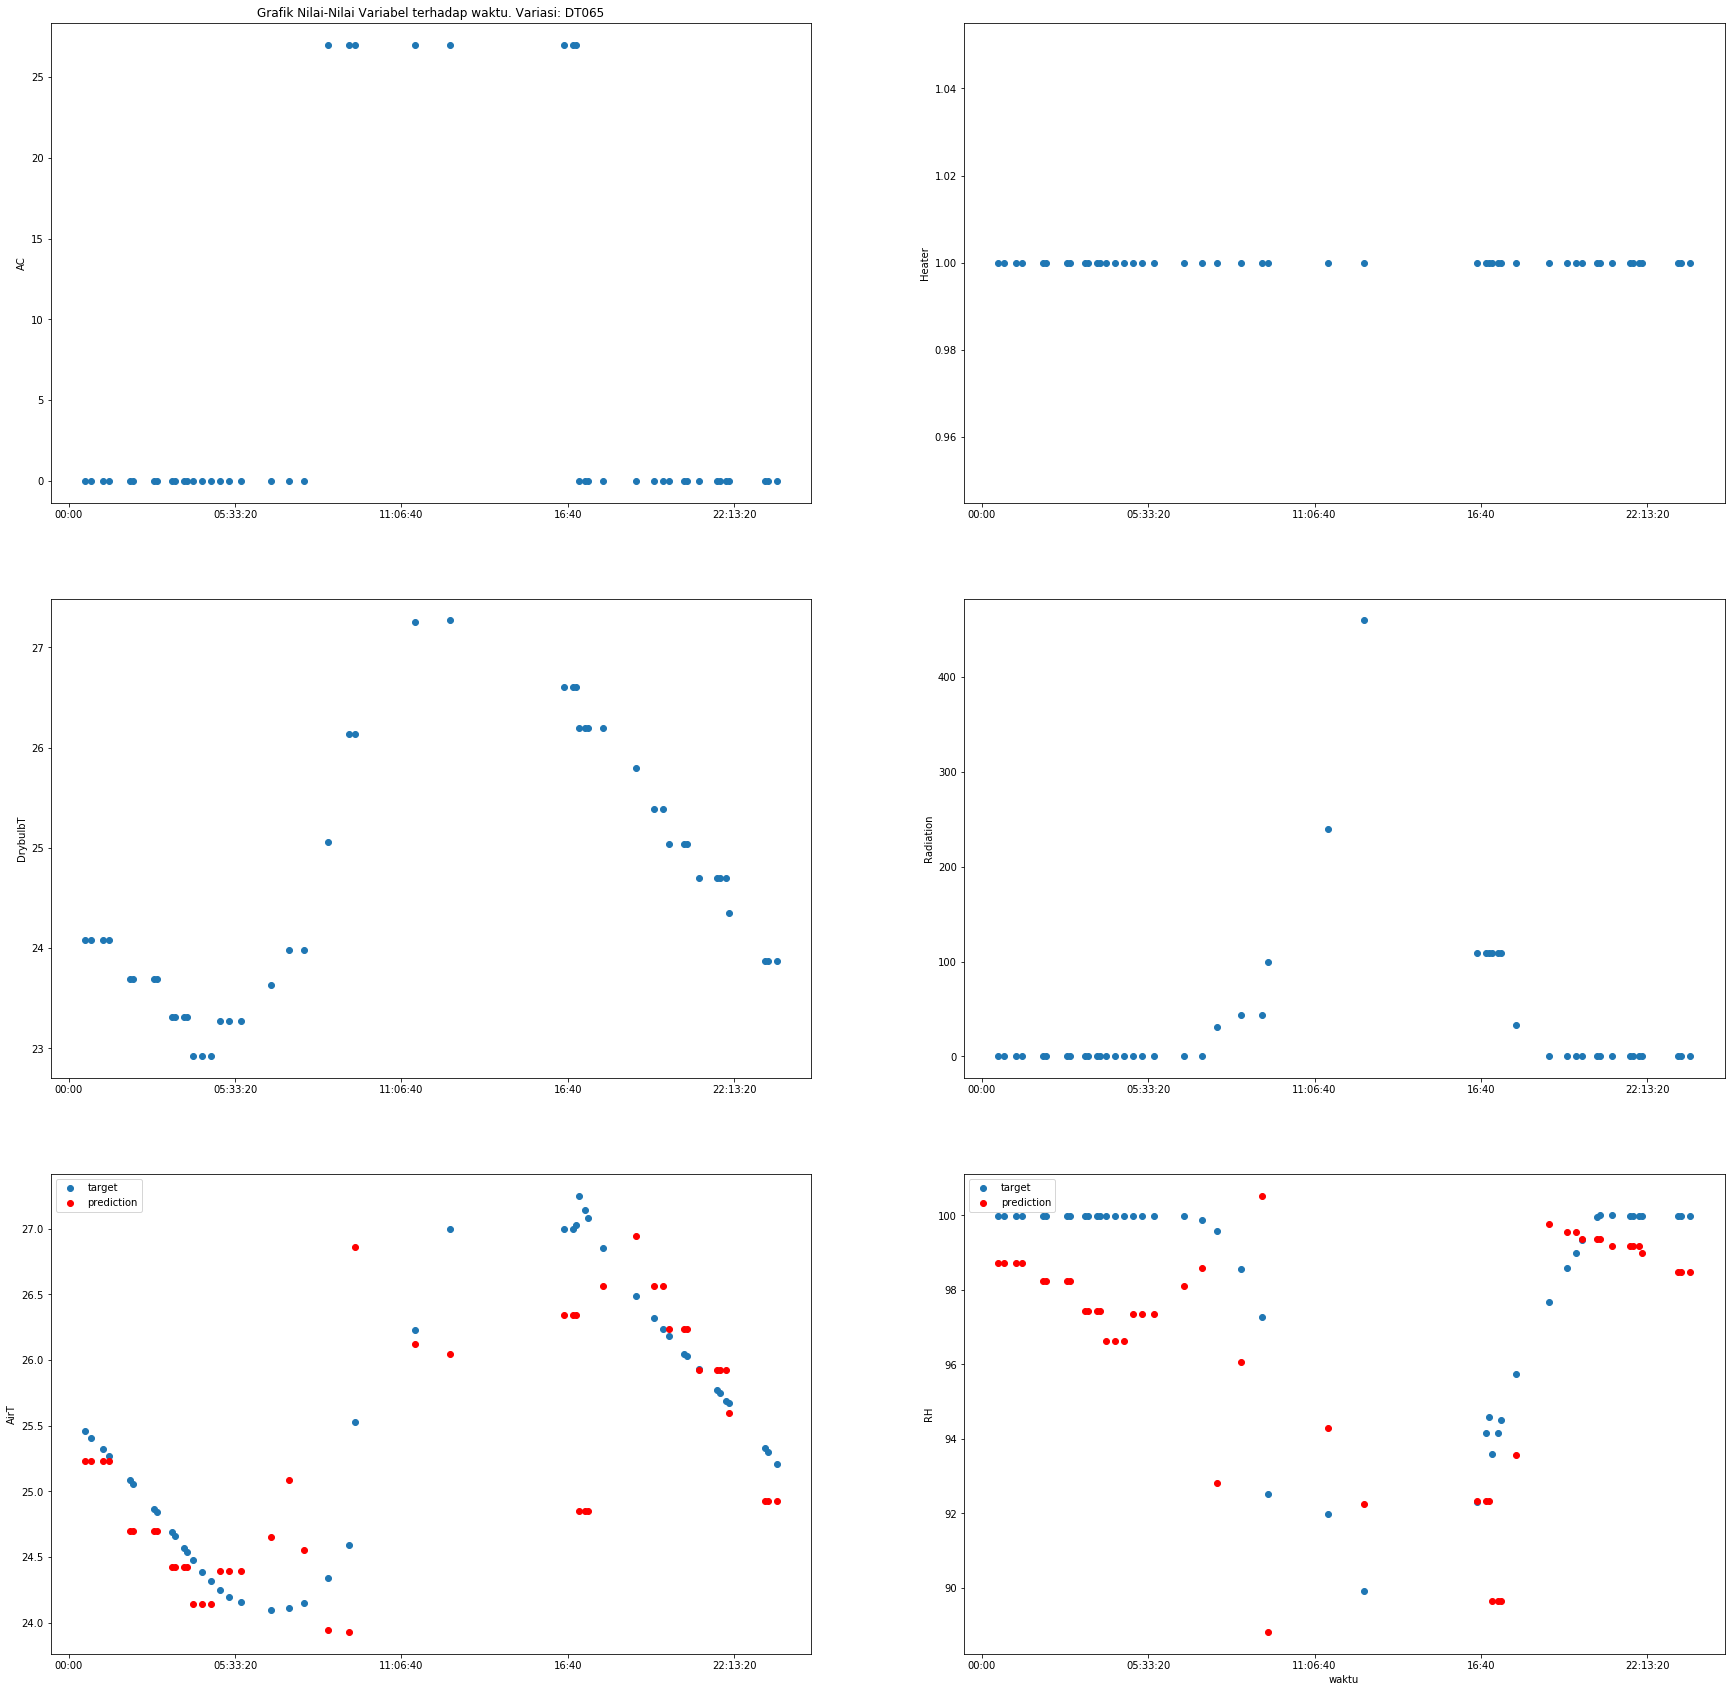

______________________________________________________________________________________________________________

Variasi: DT077


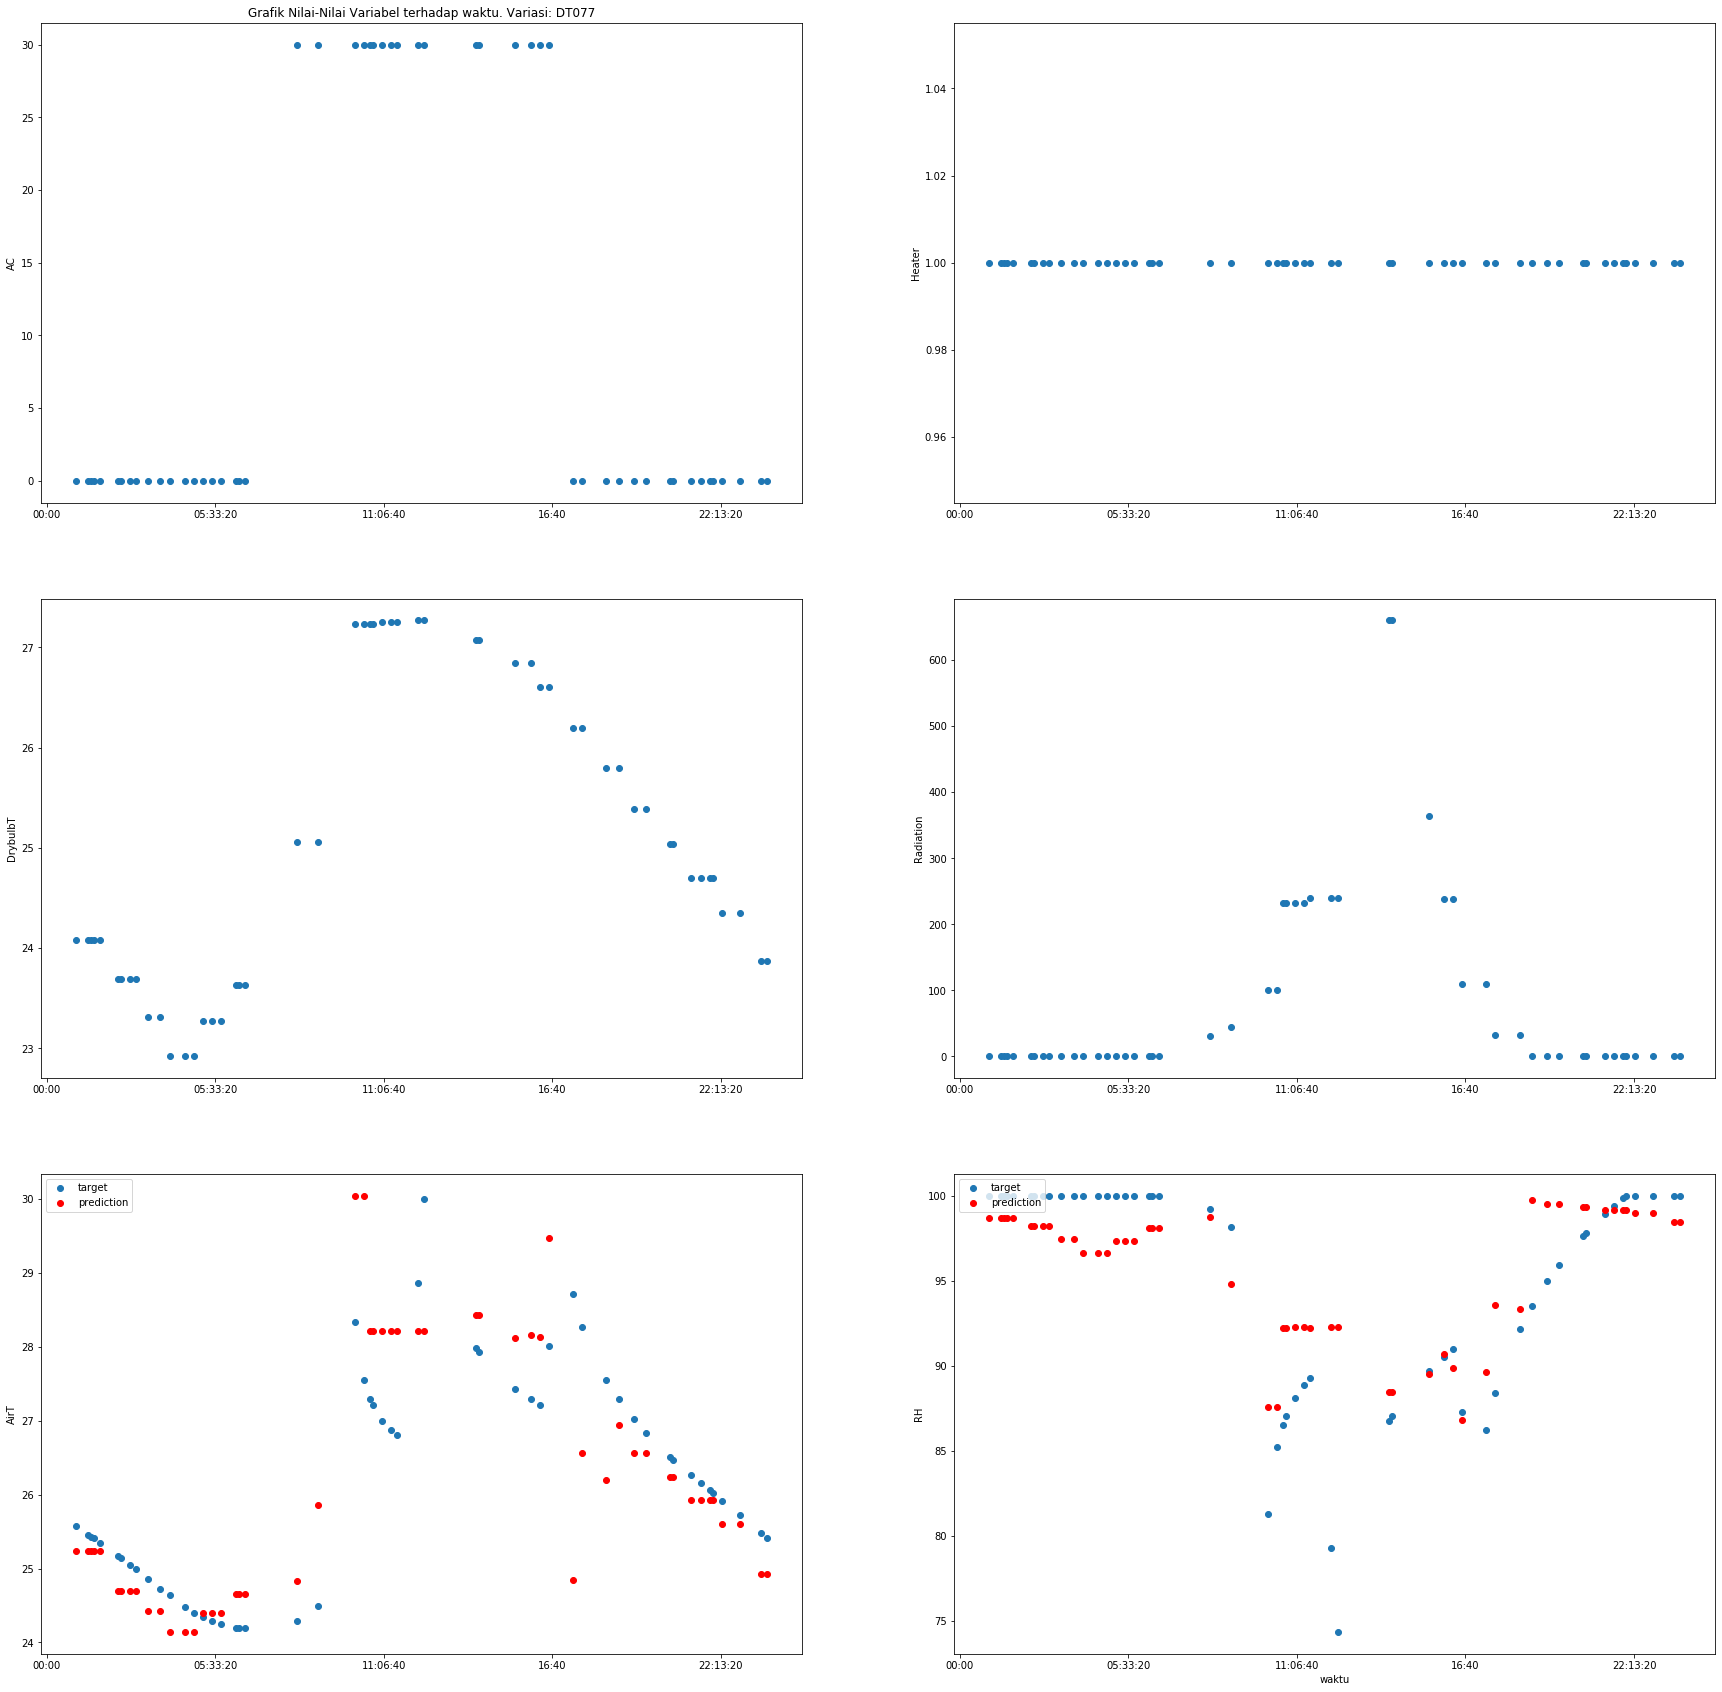

______________________________________________________________________________________________________________

Variasi: DT097


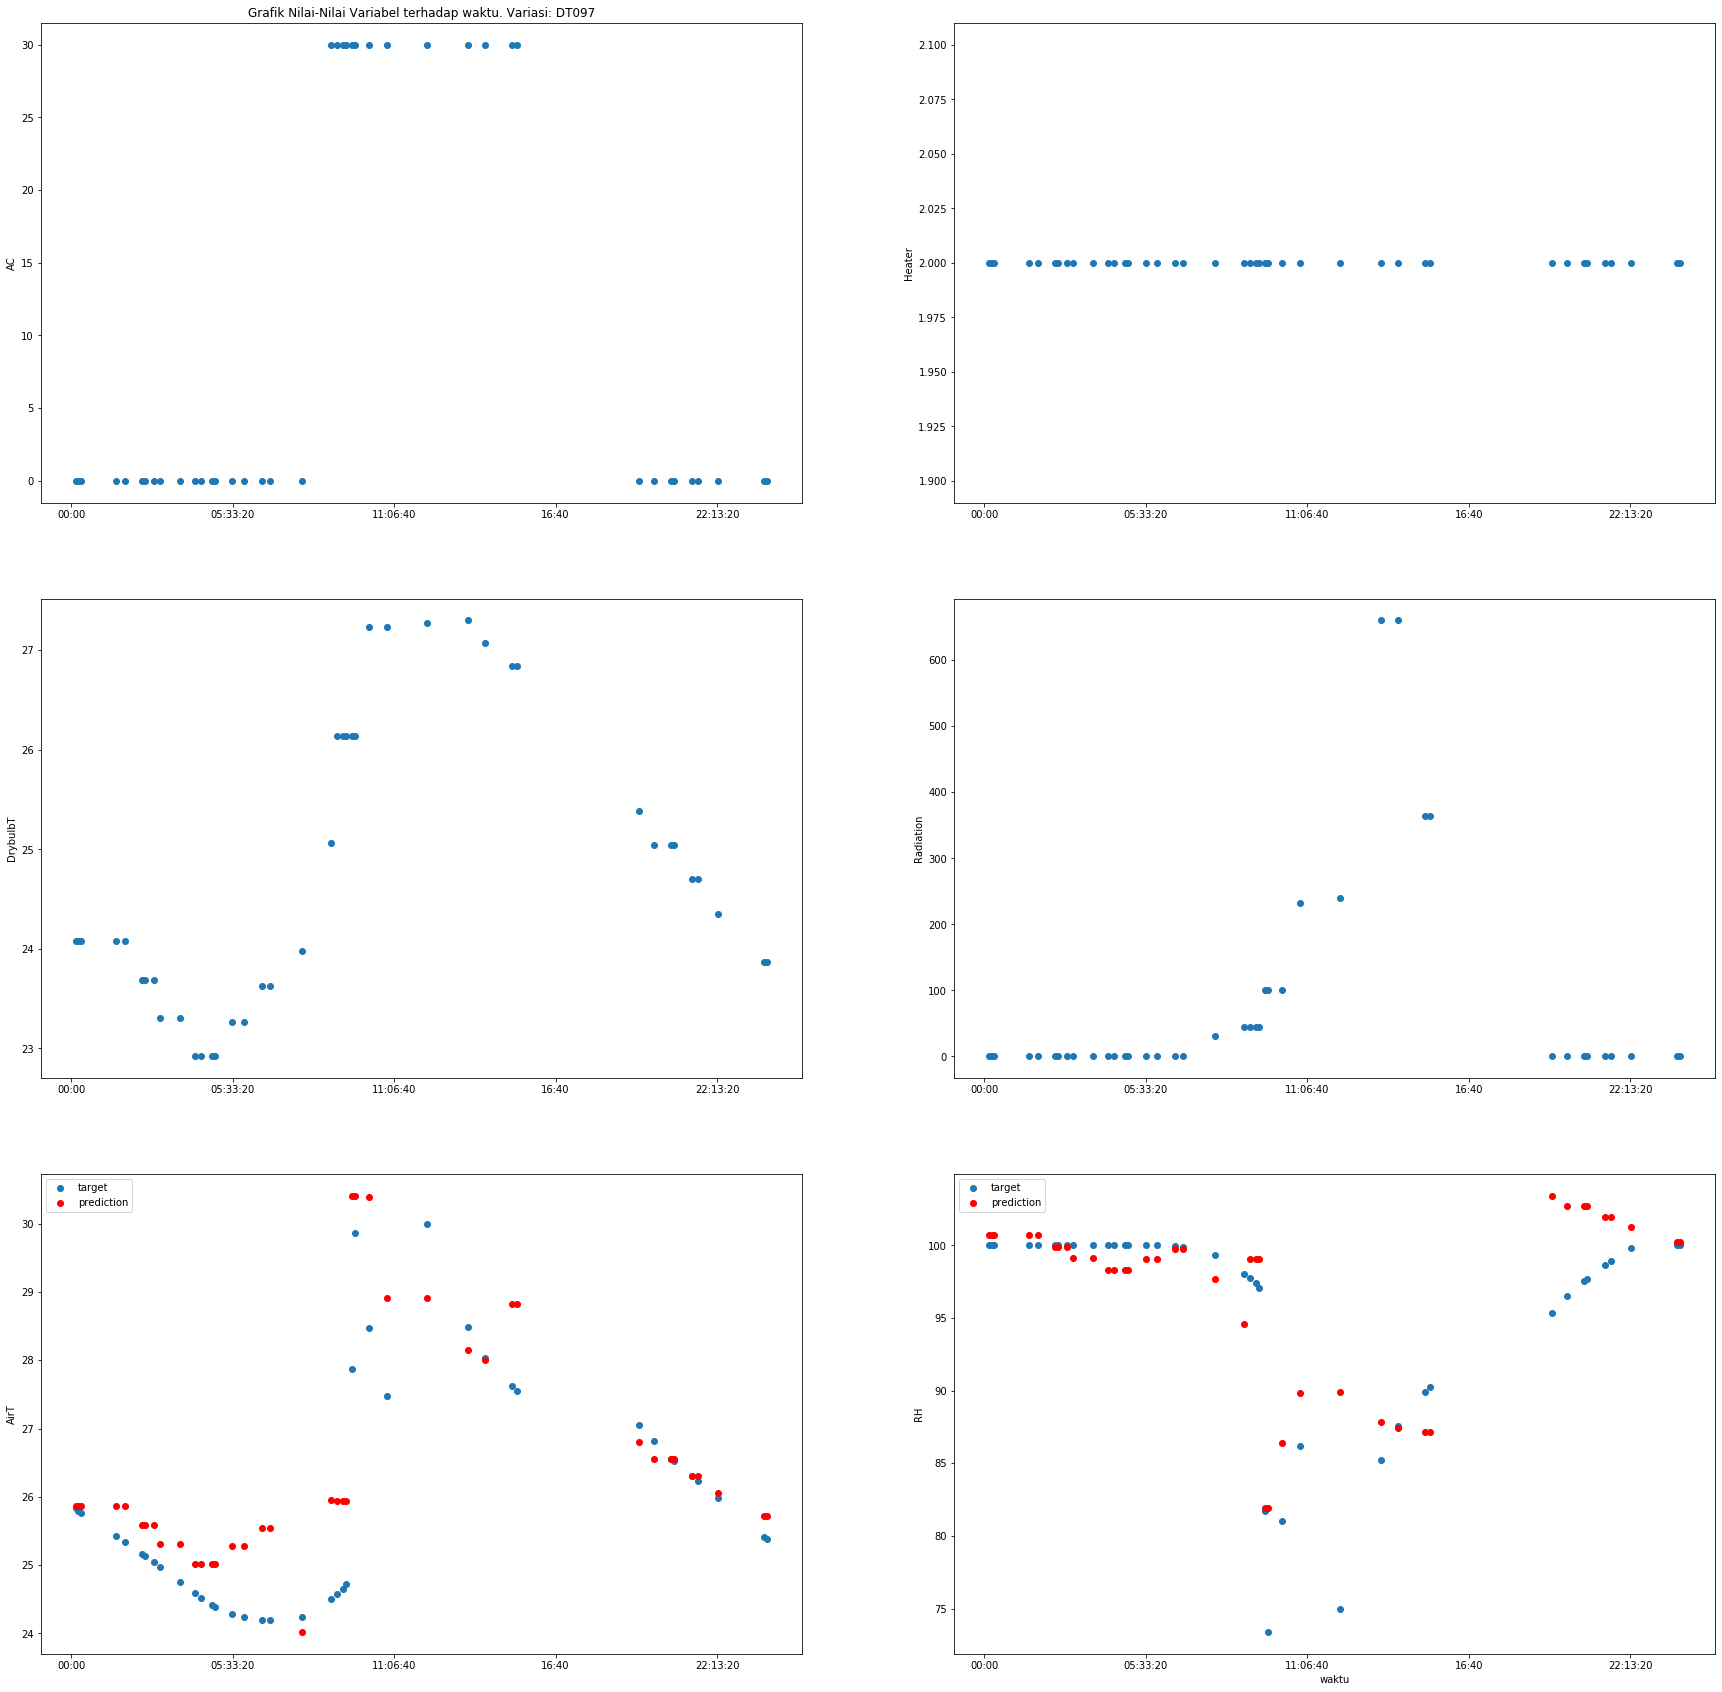

______________________________________________________________________________________________________________

Variasi: DT049


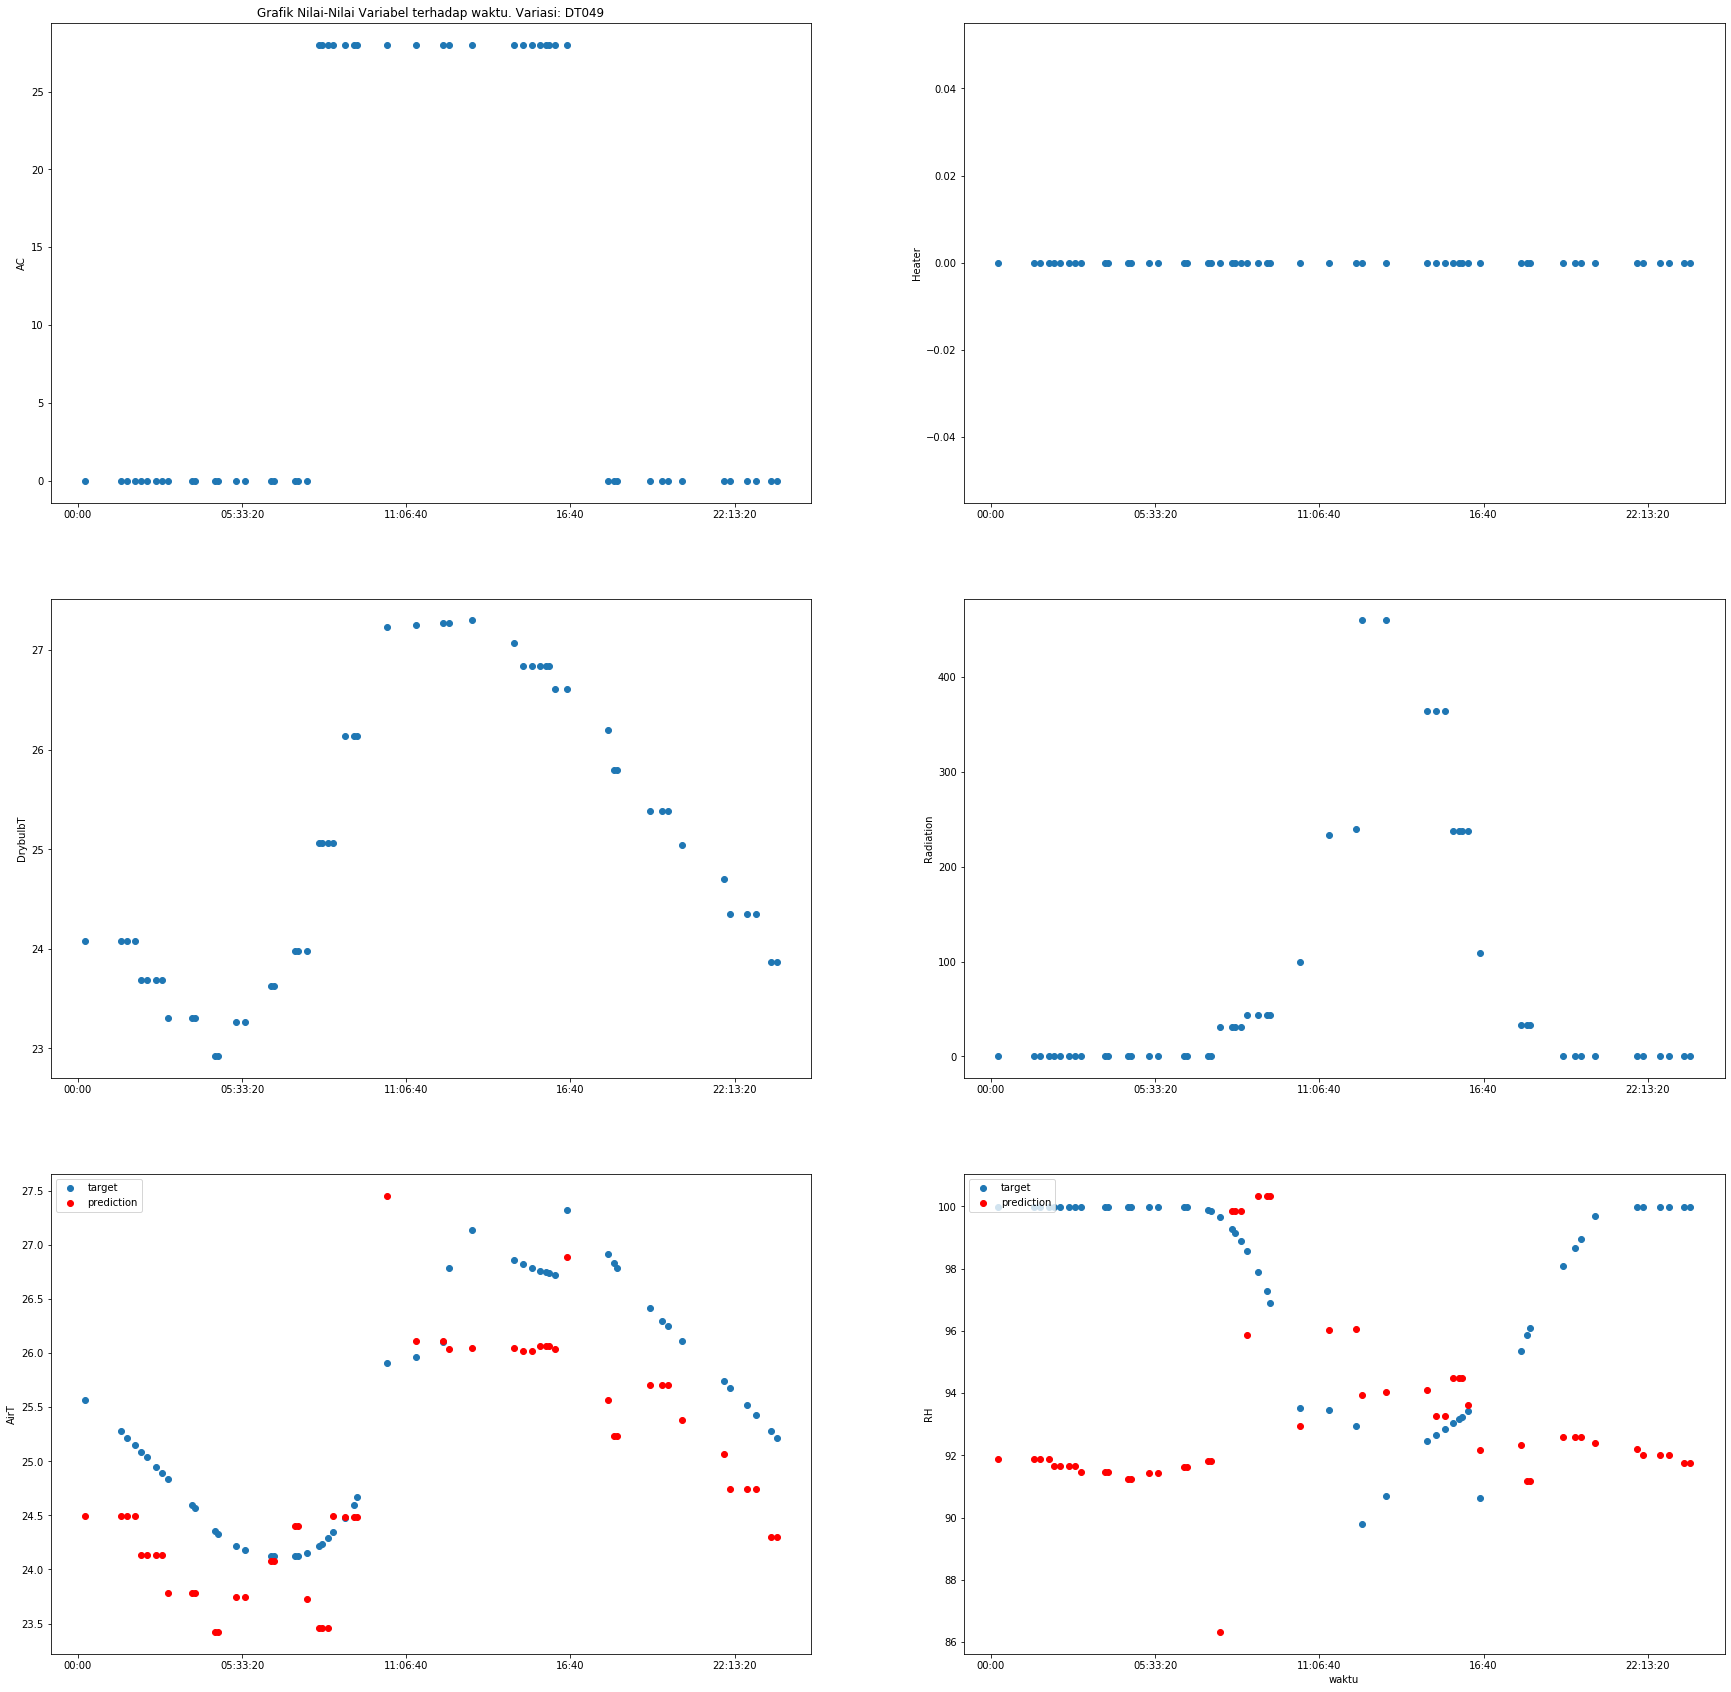

______________________________________________________________________________________________________________

Variasi: DT025


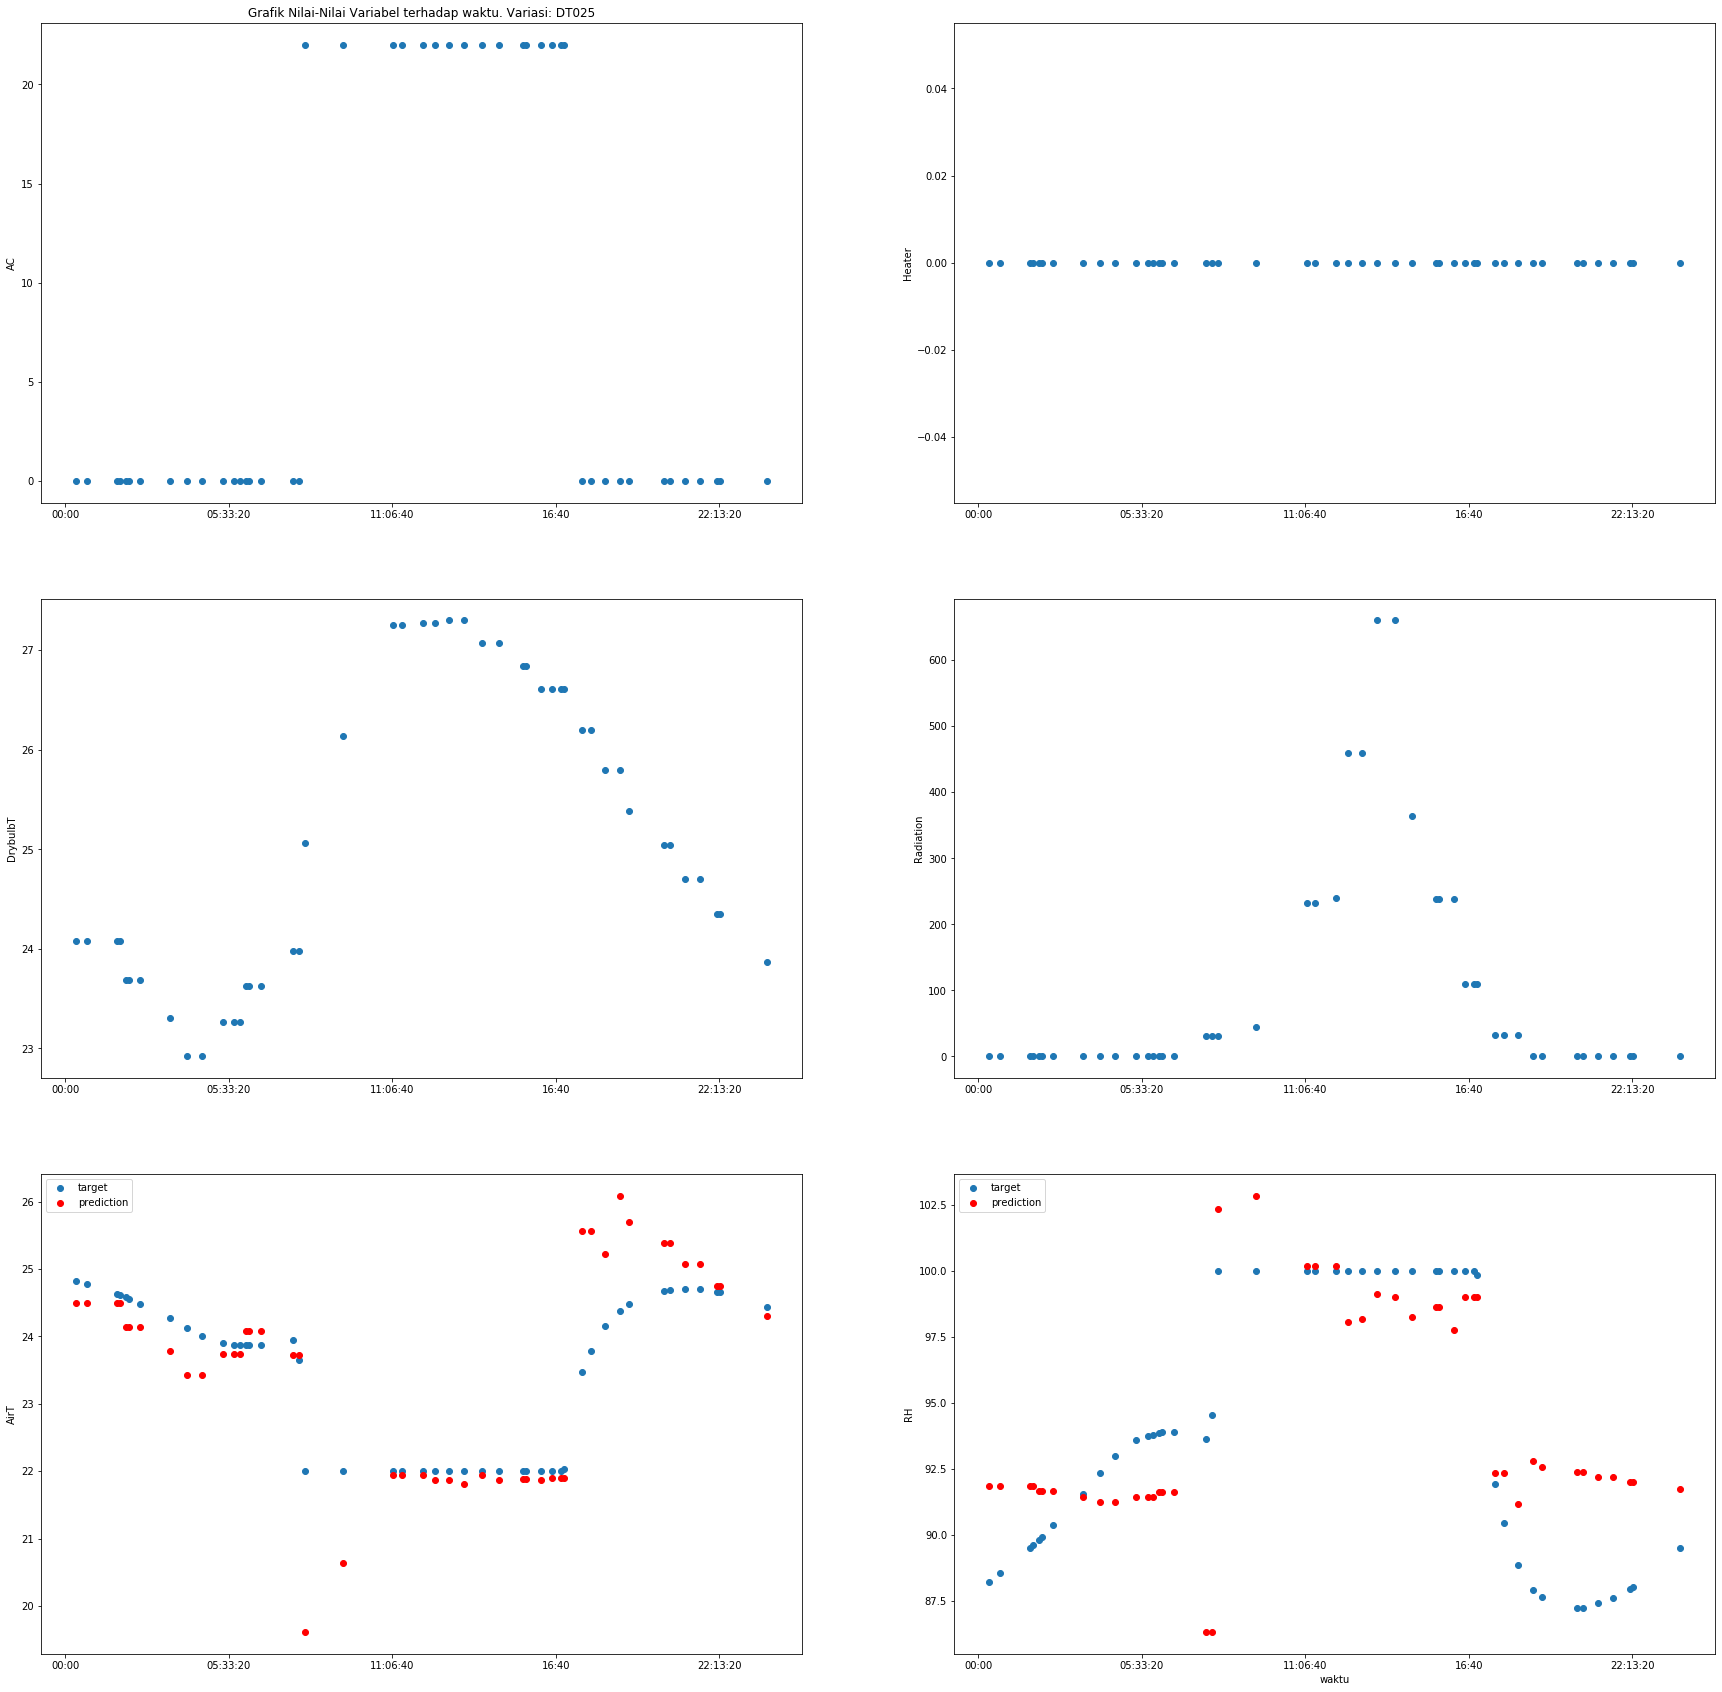

______________________________________________________________________________________________________________

Variasi: DT085


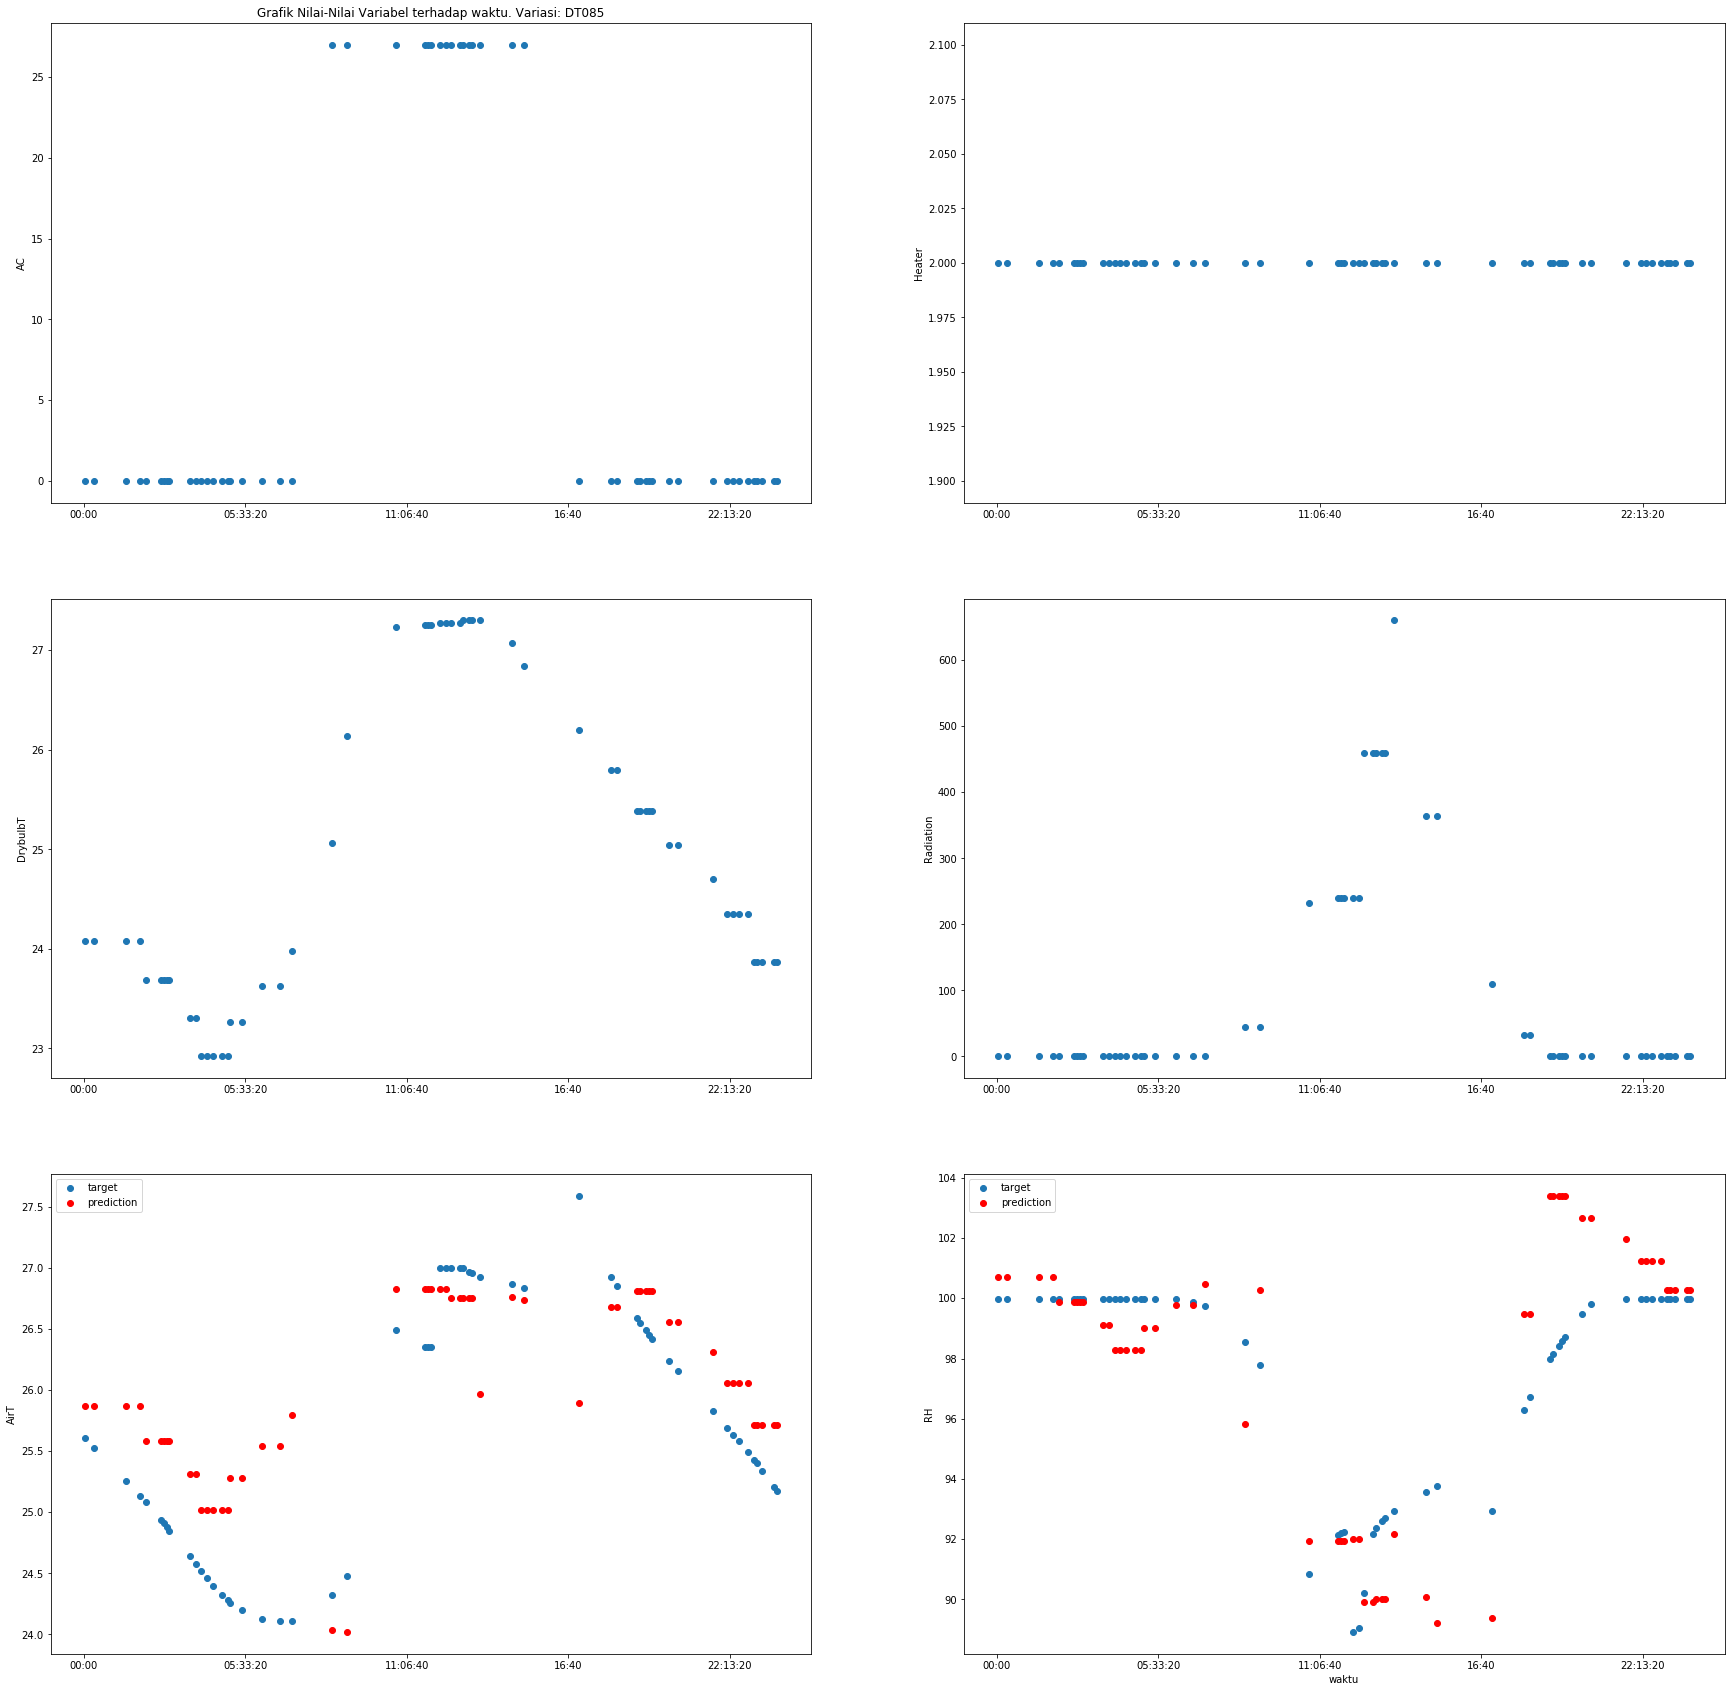

______________________________________________________________________________________________________________

Variasi: DT077


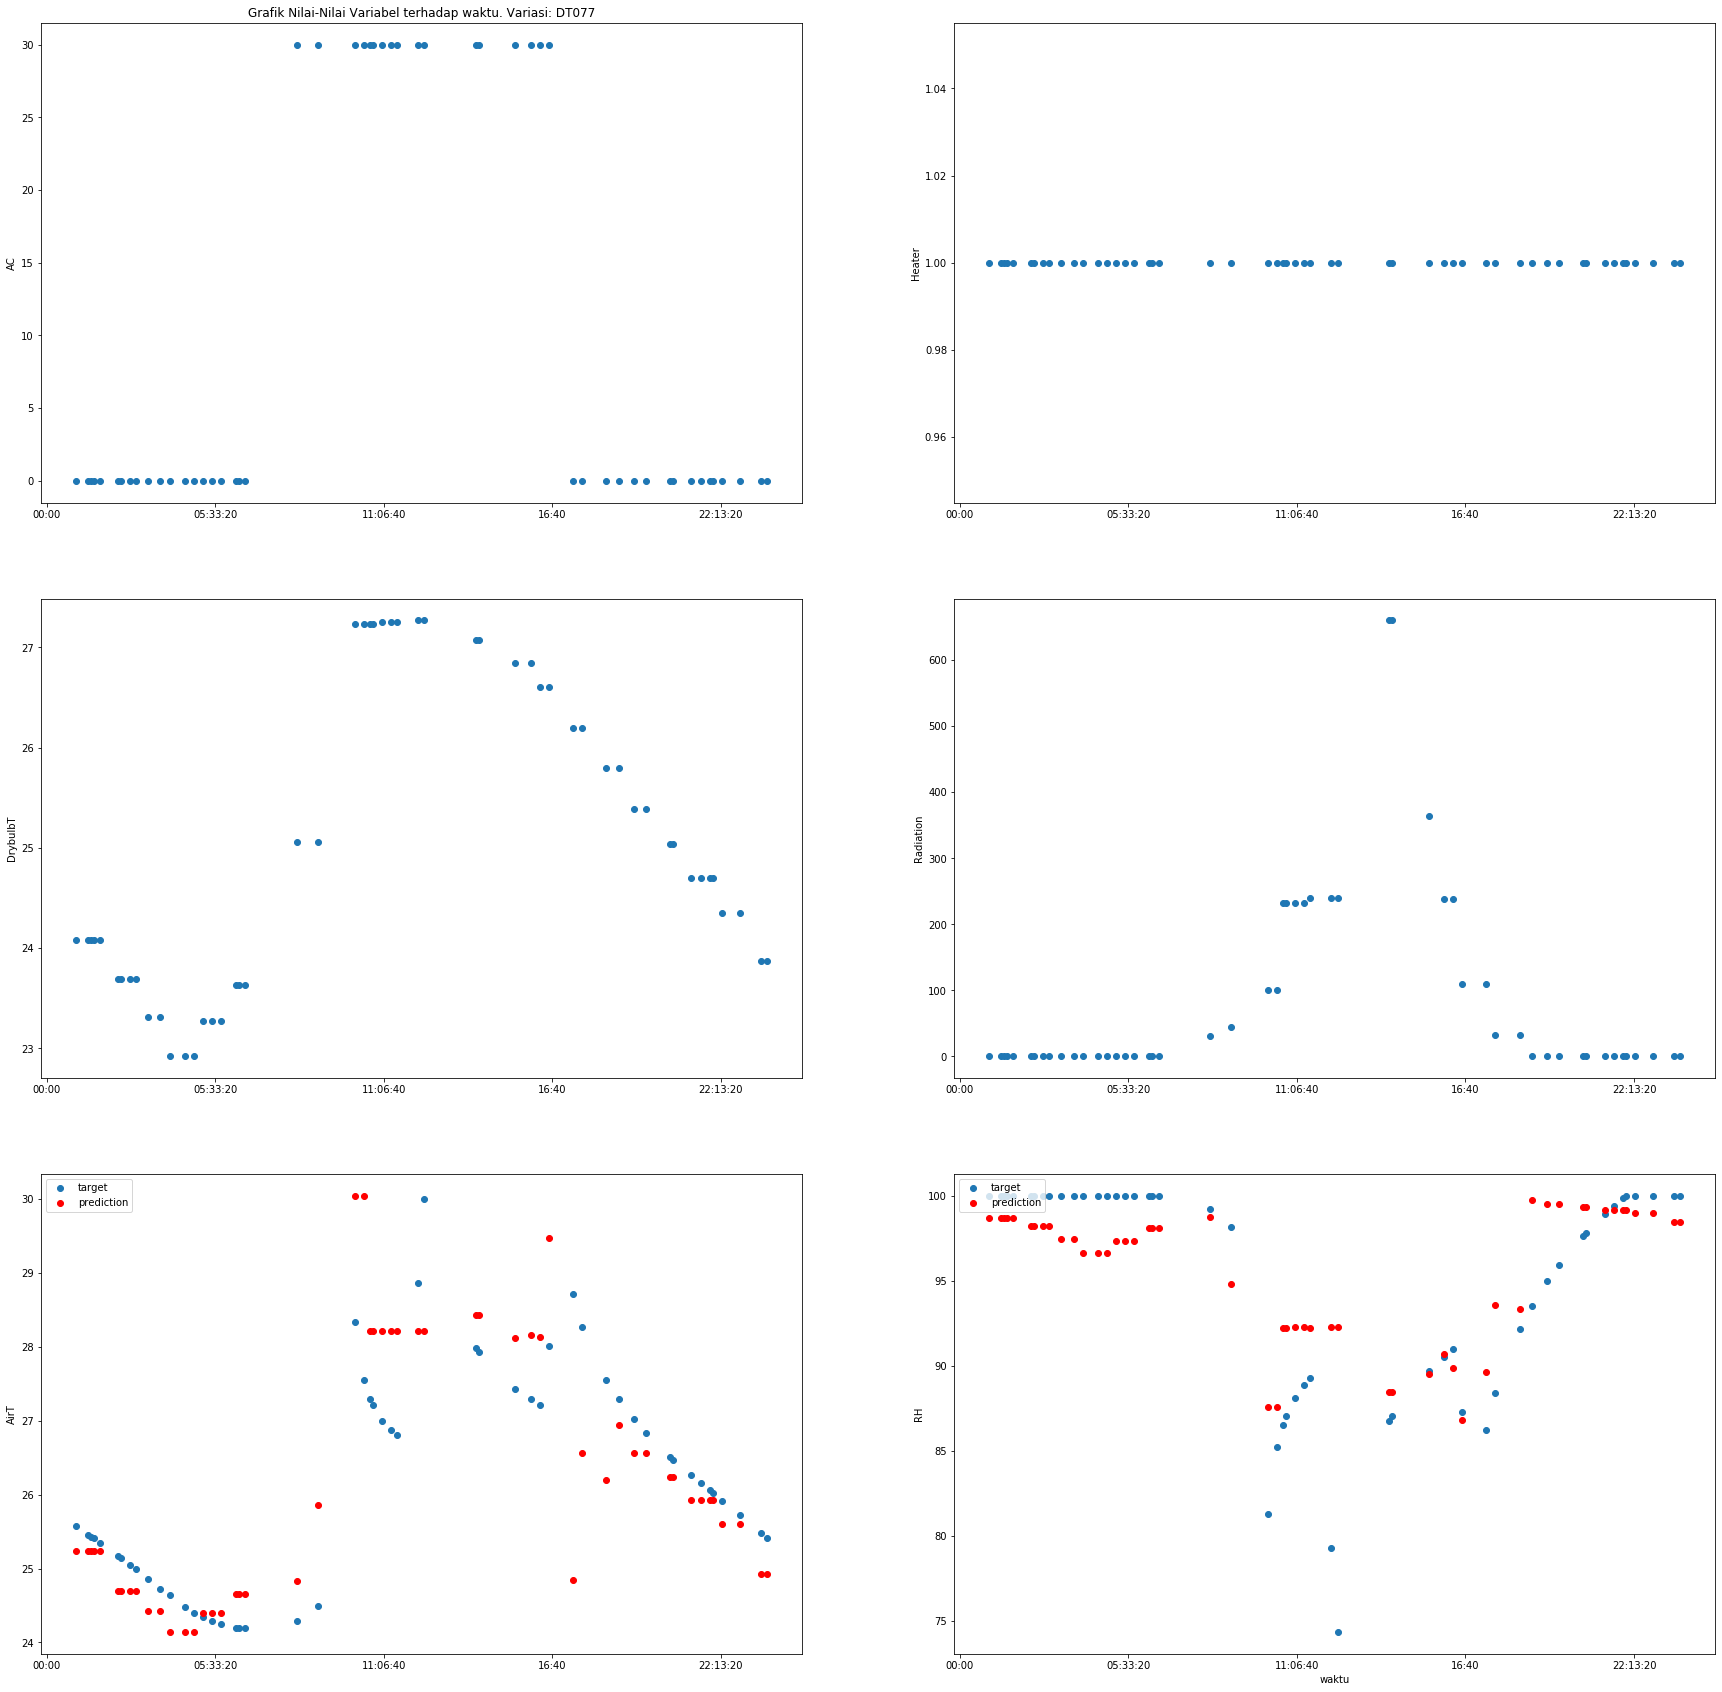

______________________________________________________________________________________________________________

Variasi: DT033


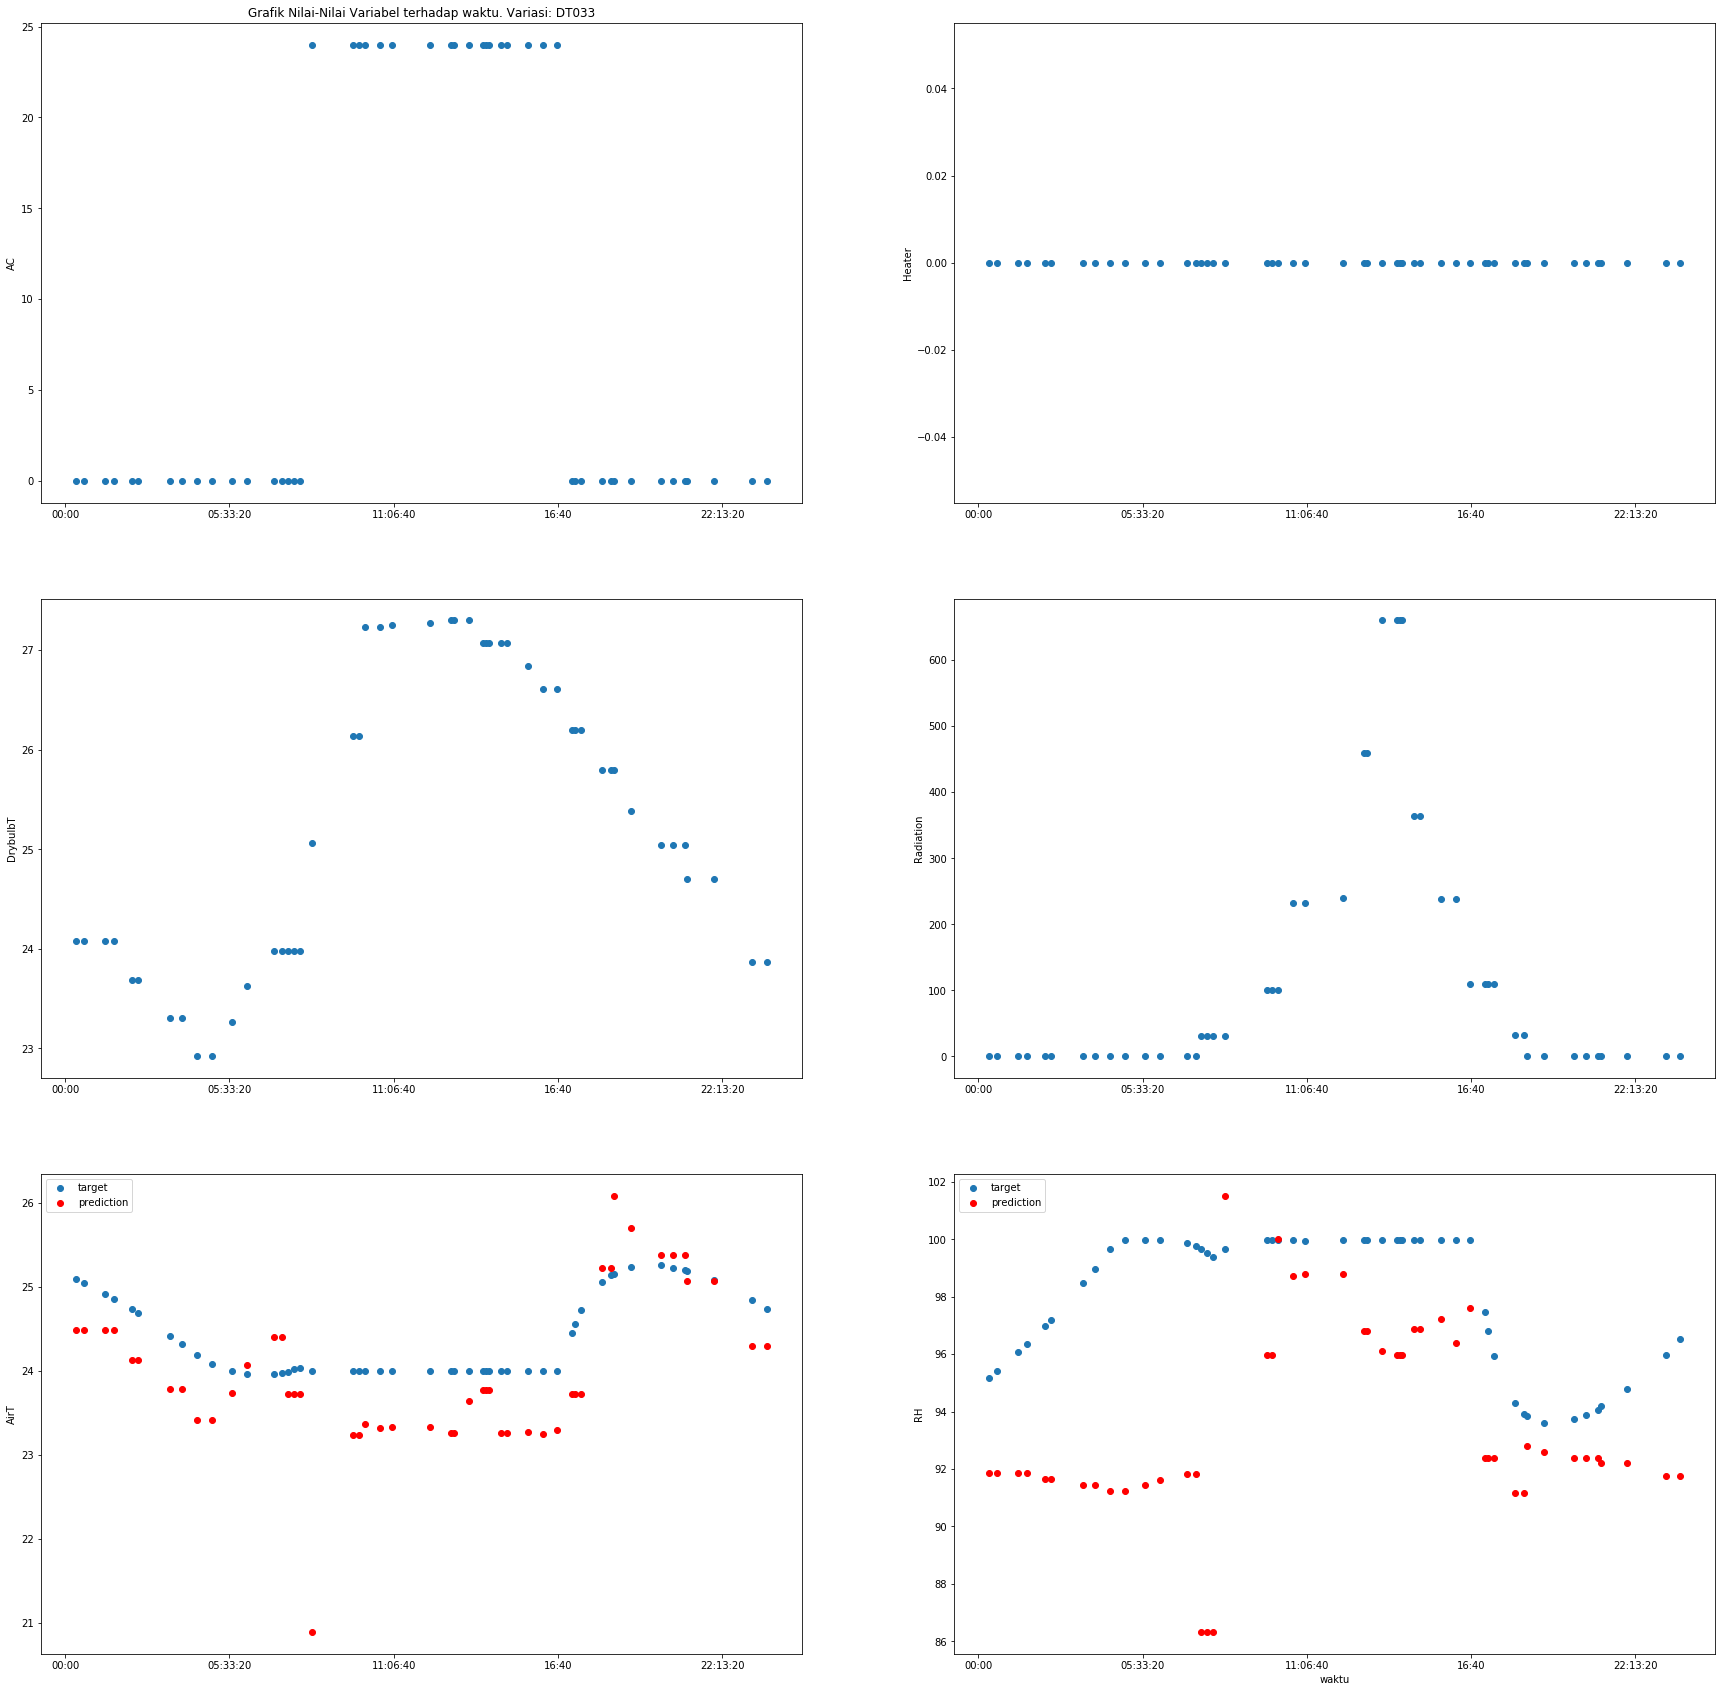

______________________________________________________________________________________________________________

Variasi: DT085


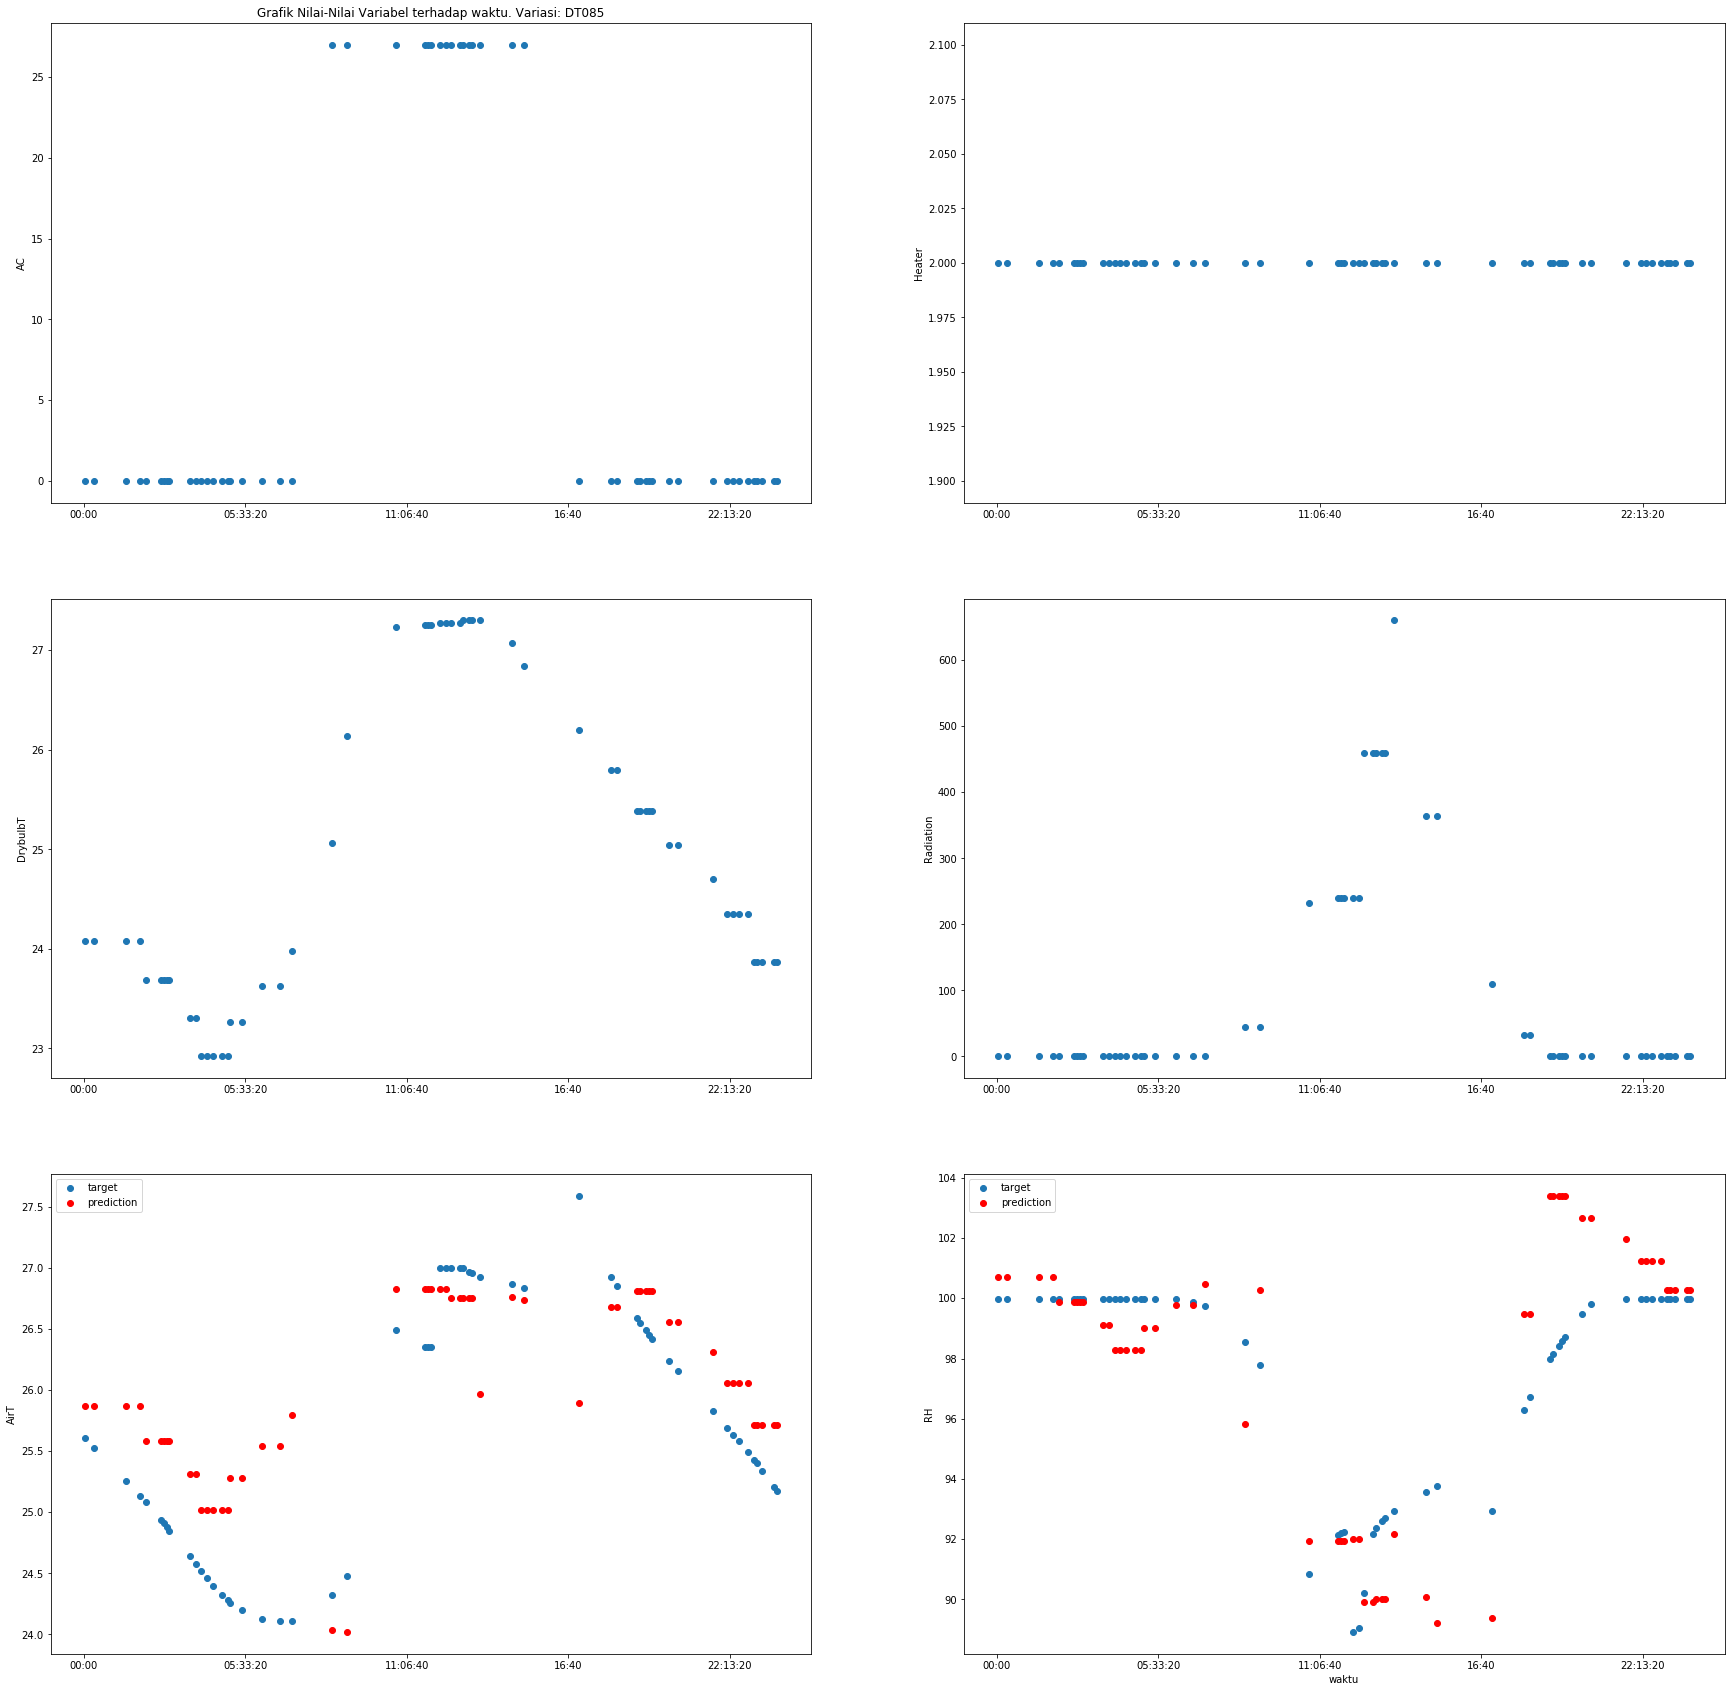

______________________________________________________________________________________________________________

Variasi: DT037


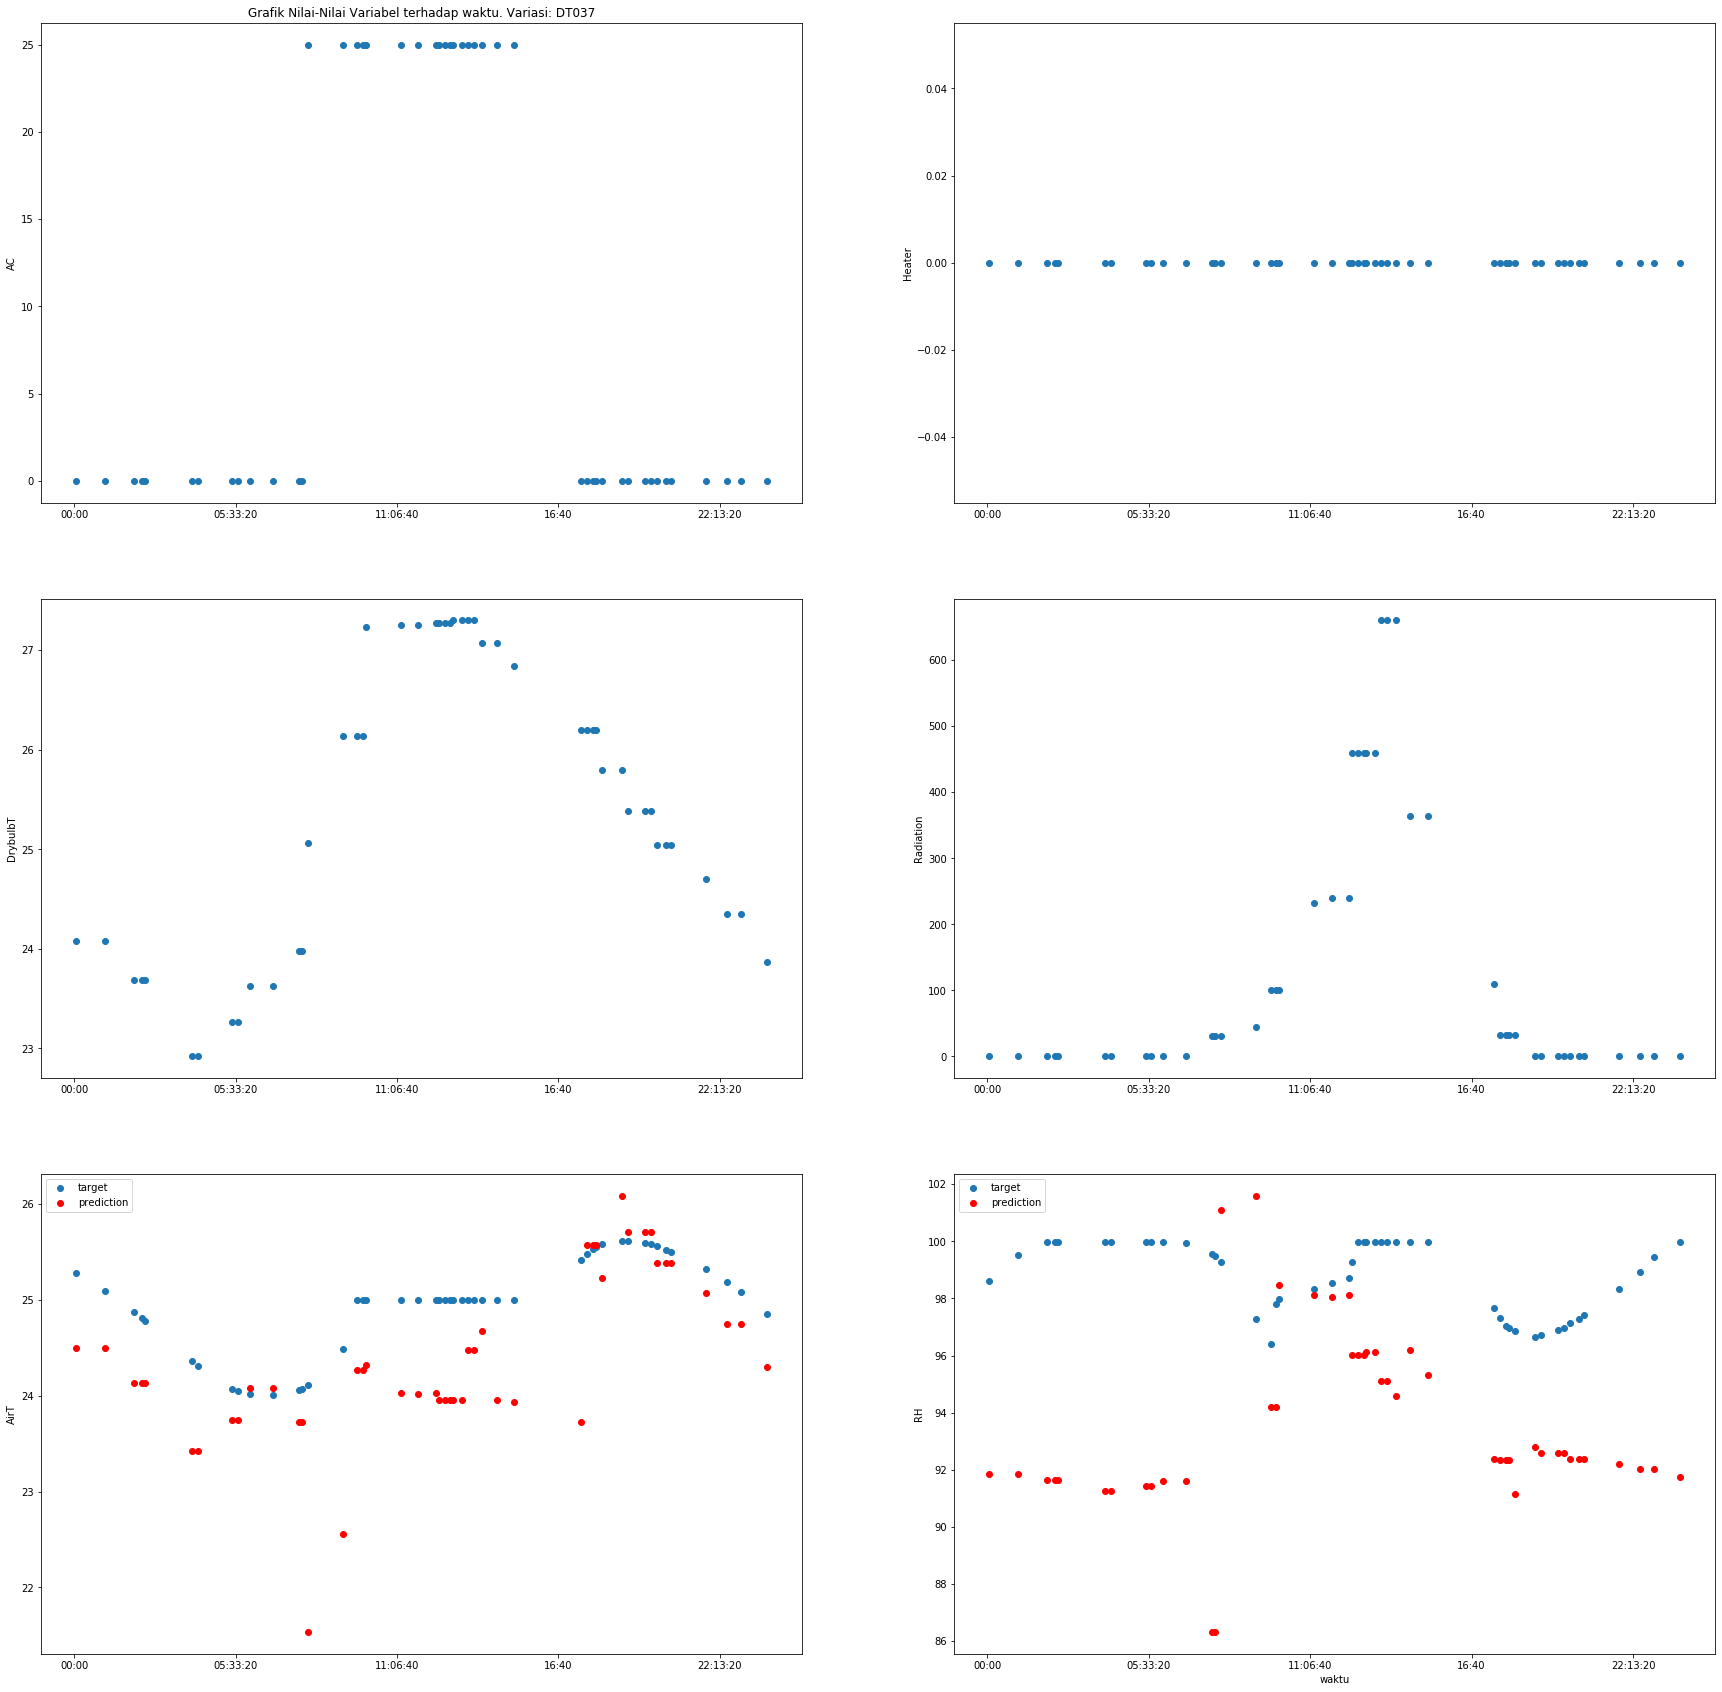

______________________________________________________________________________________________________________

Variasi: DT069


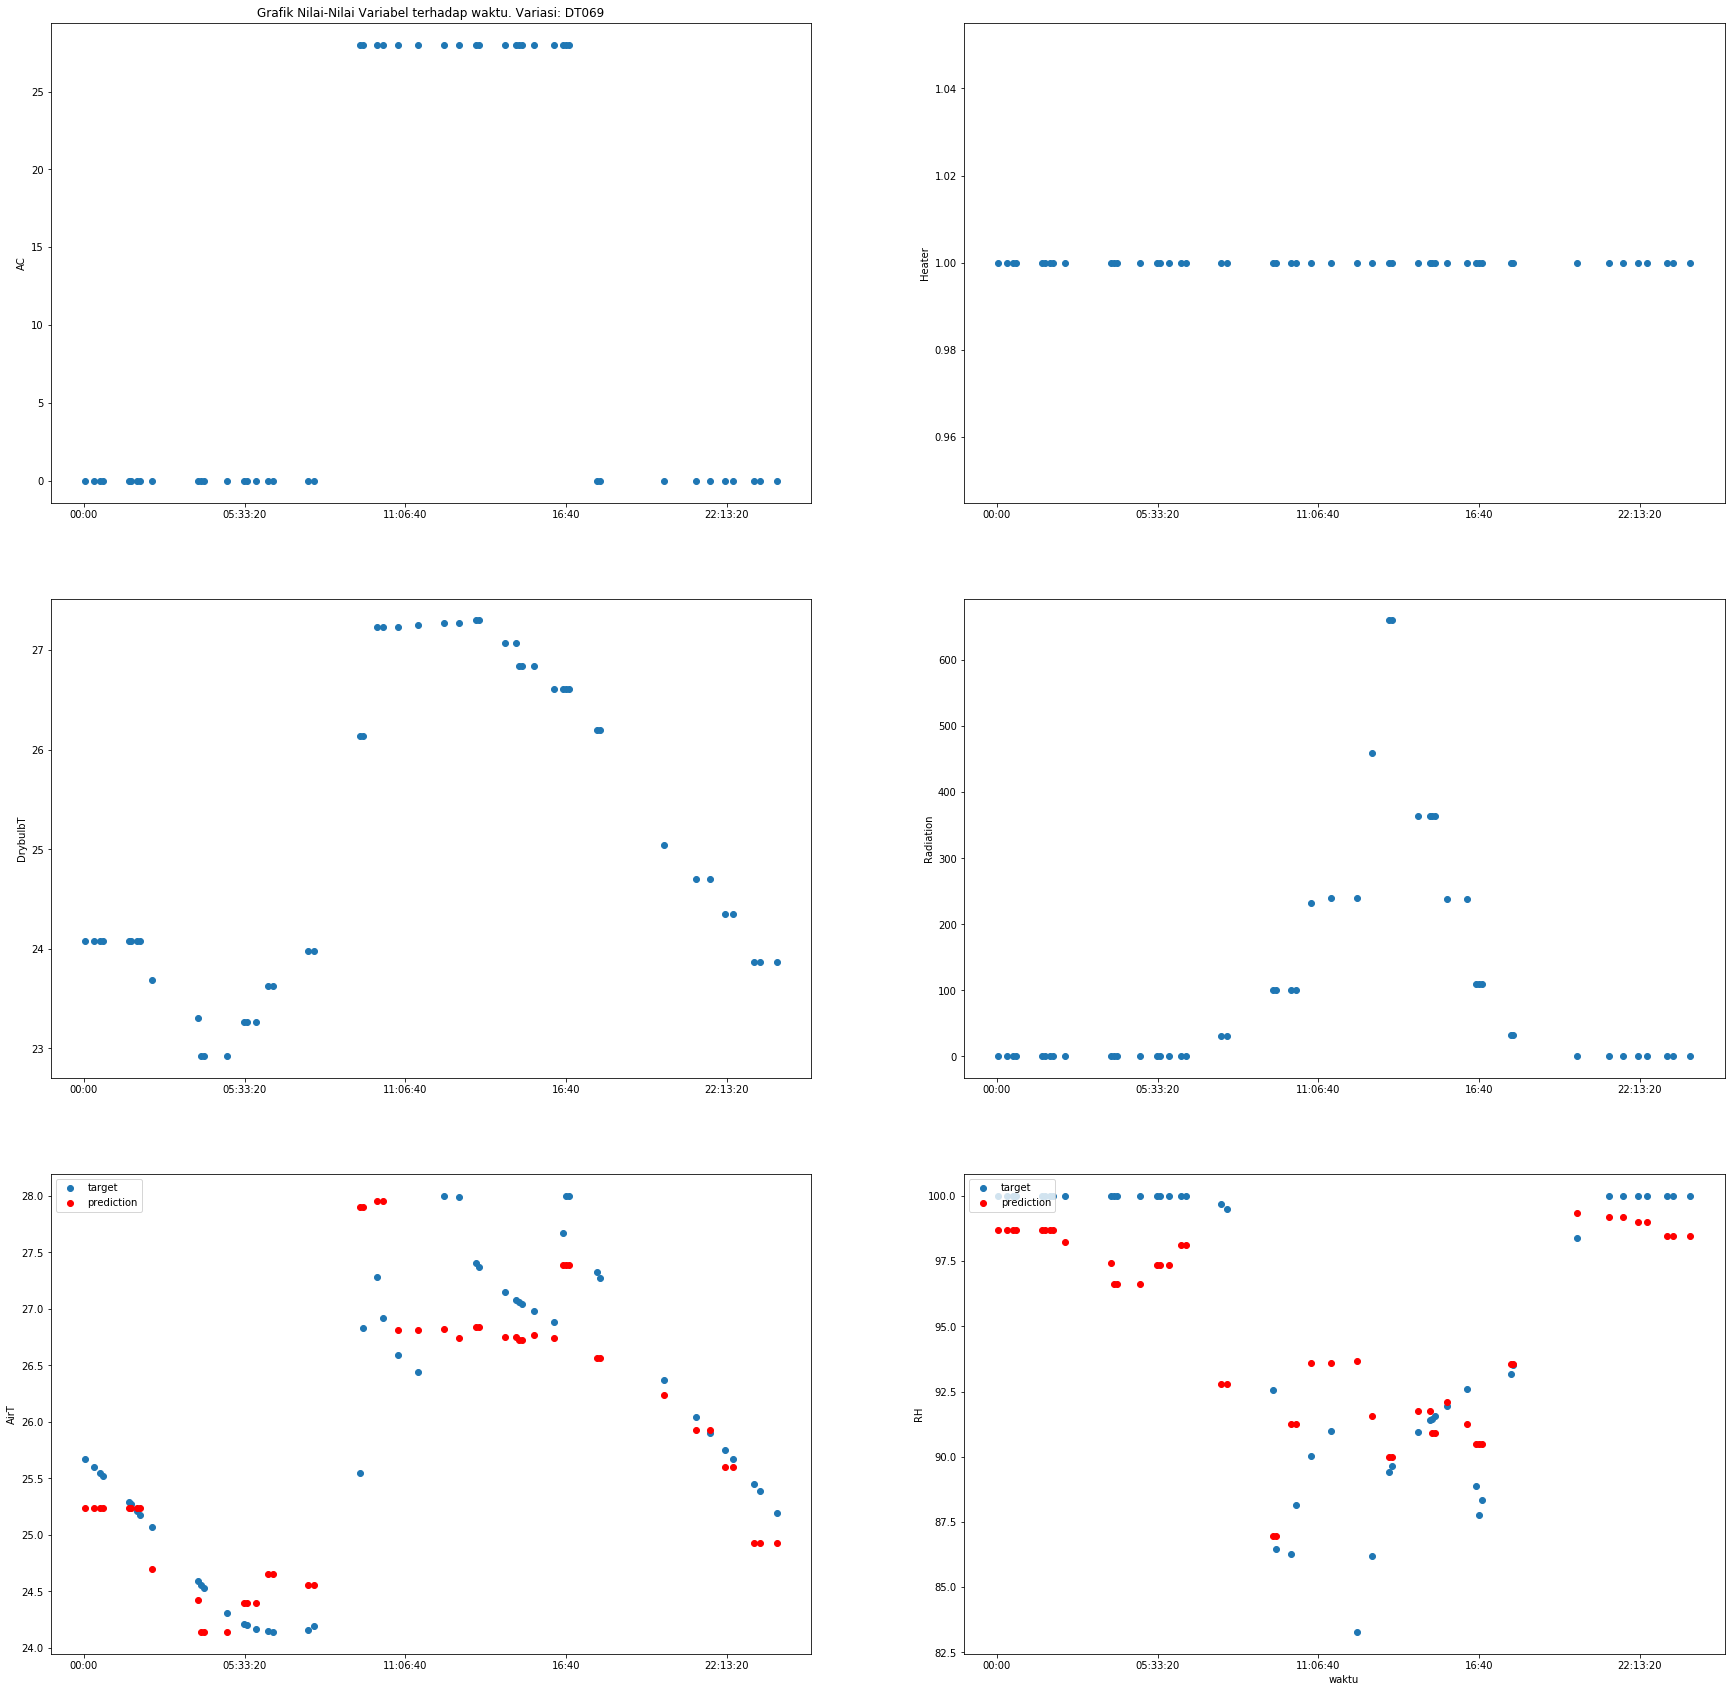

______________________________________________________________________________________________________________

Variasi: DT013


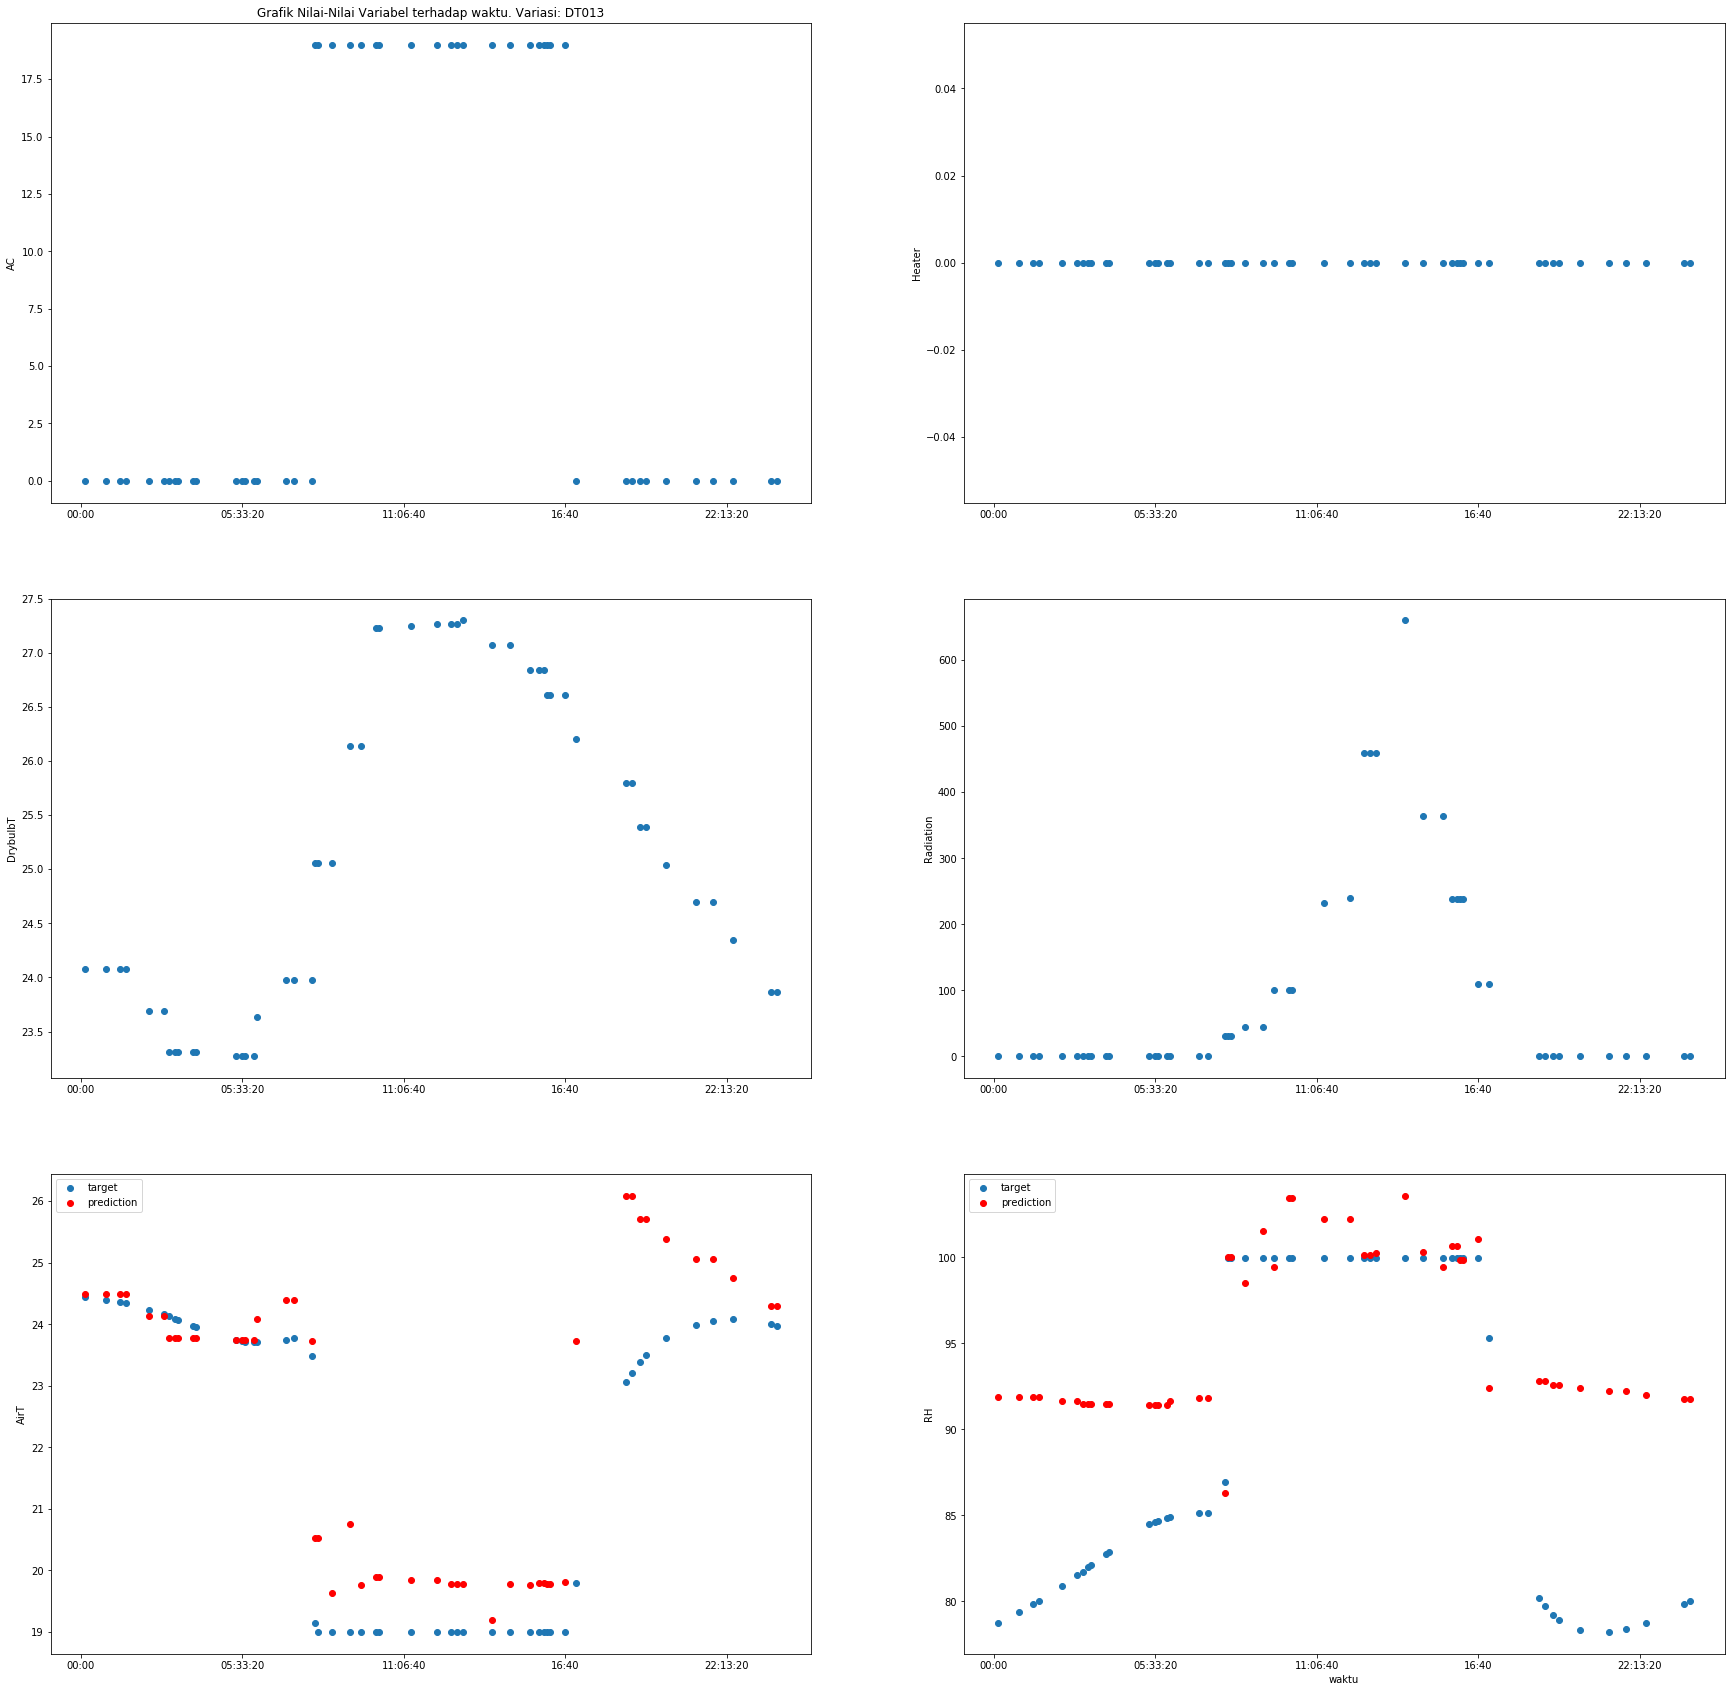

______________________________________________________________________________________________________________

Variasi: DT057


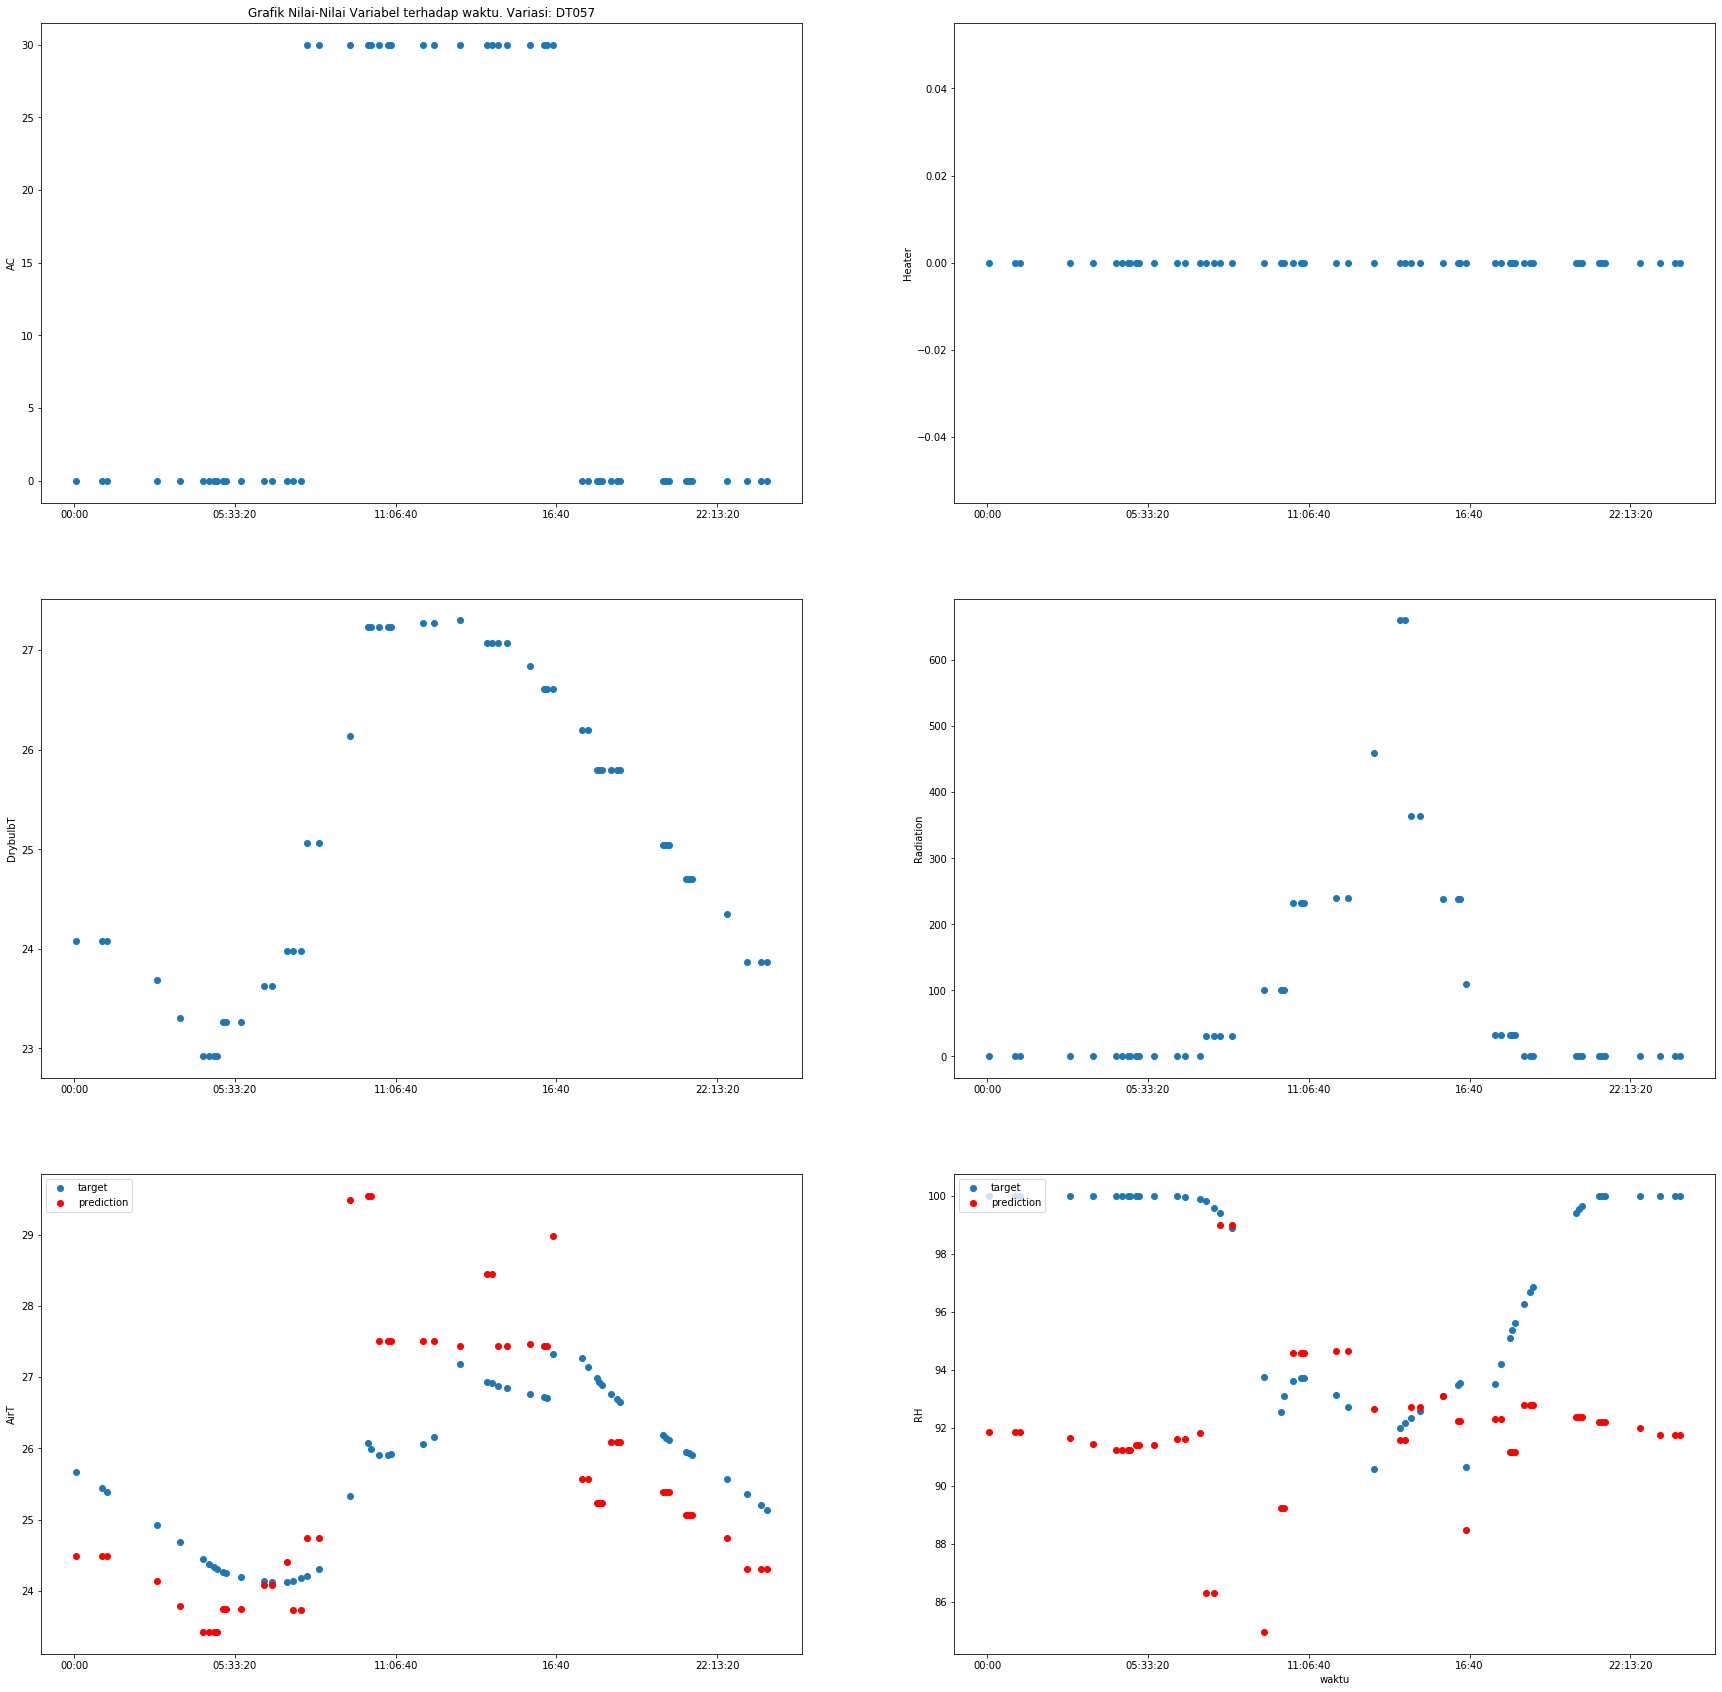

______________________________________________________________________________________________________________

Variasi: DT049


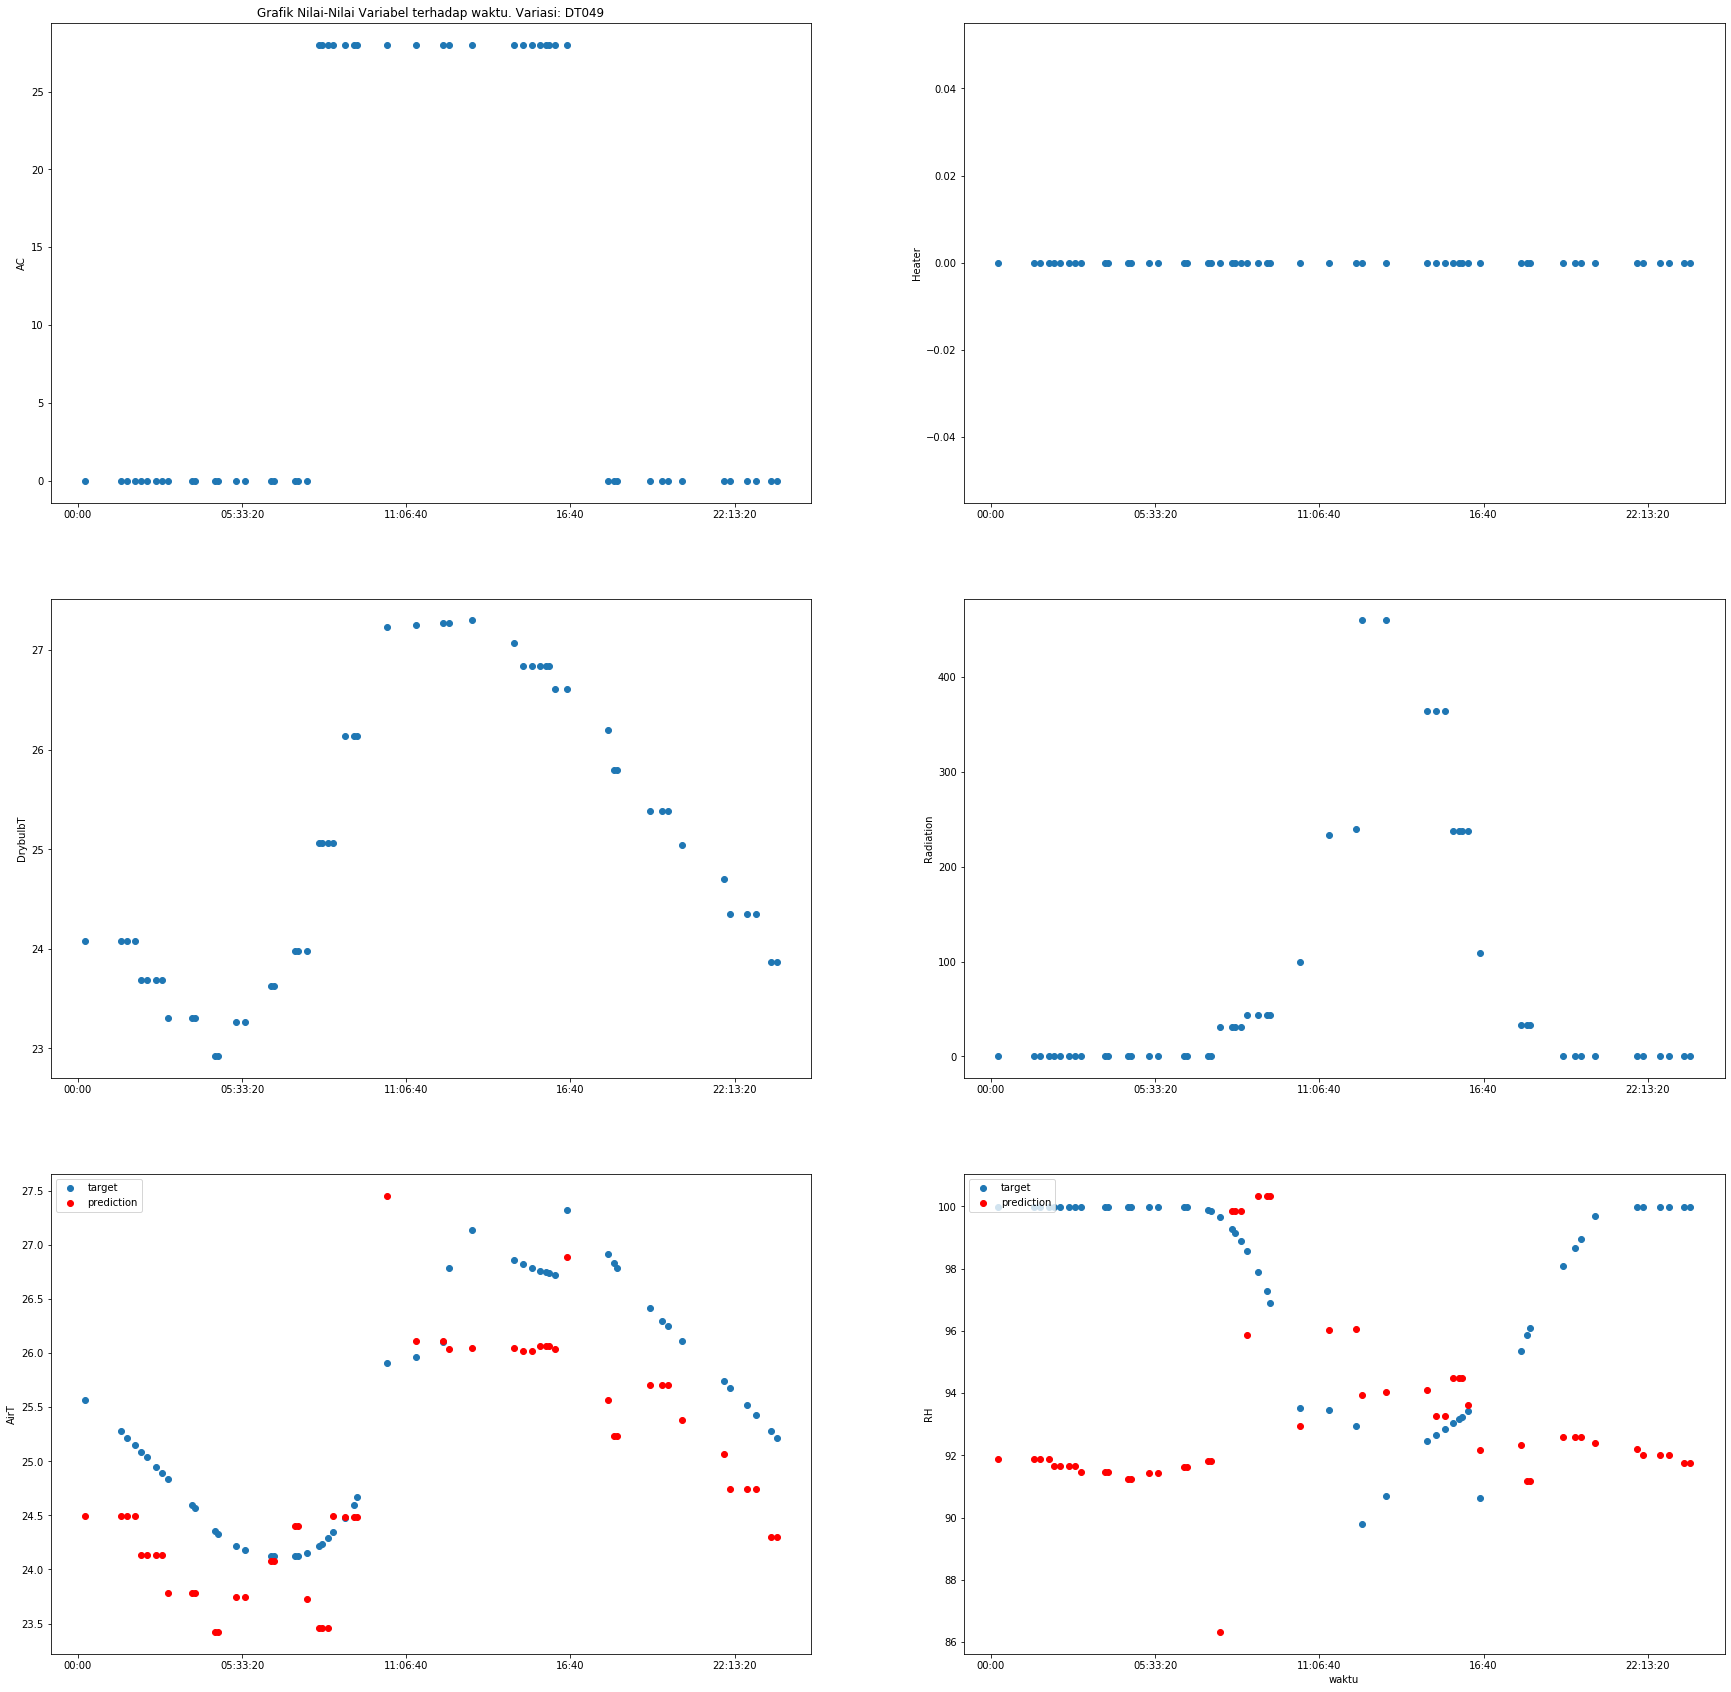

______________________________________________________________________________________________________________

Variasi: DT061


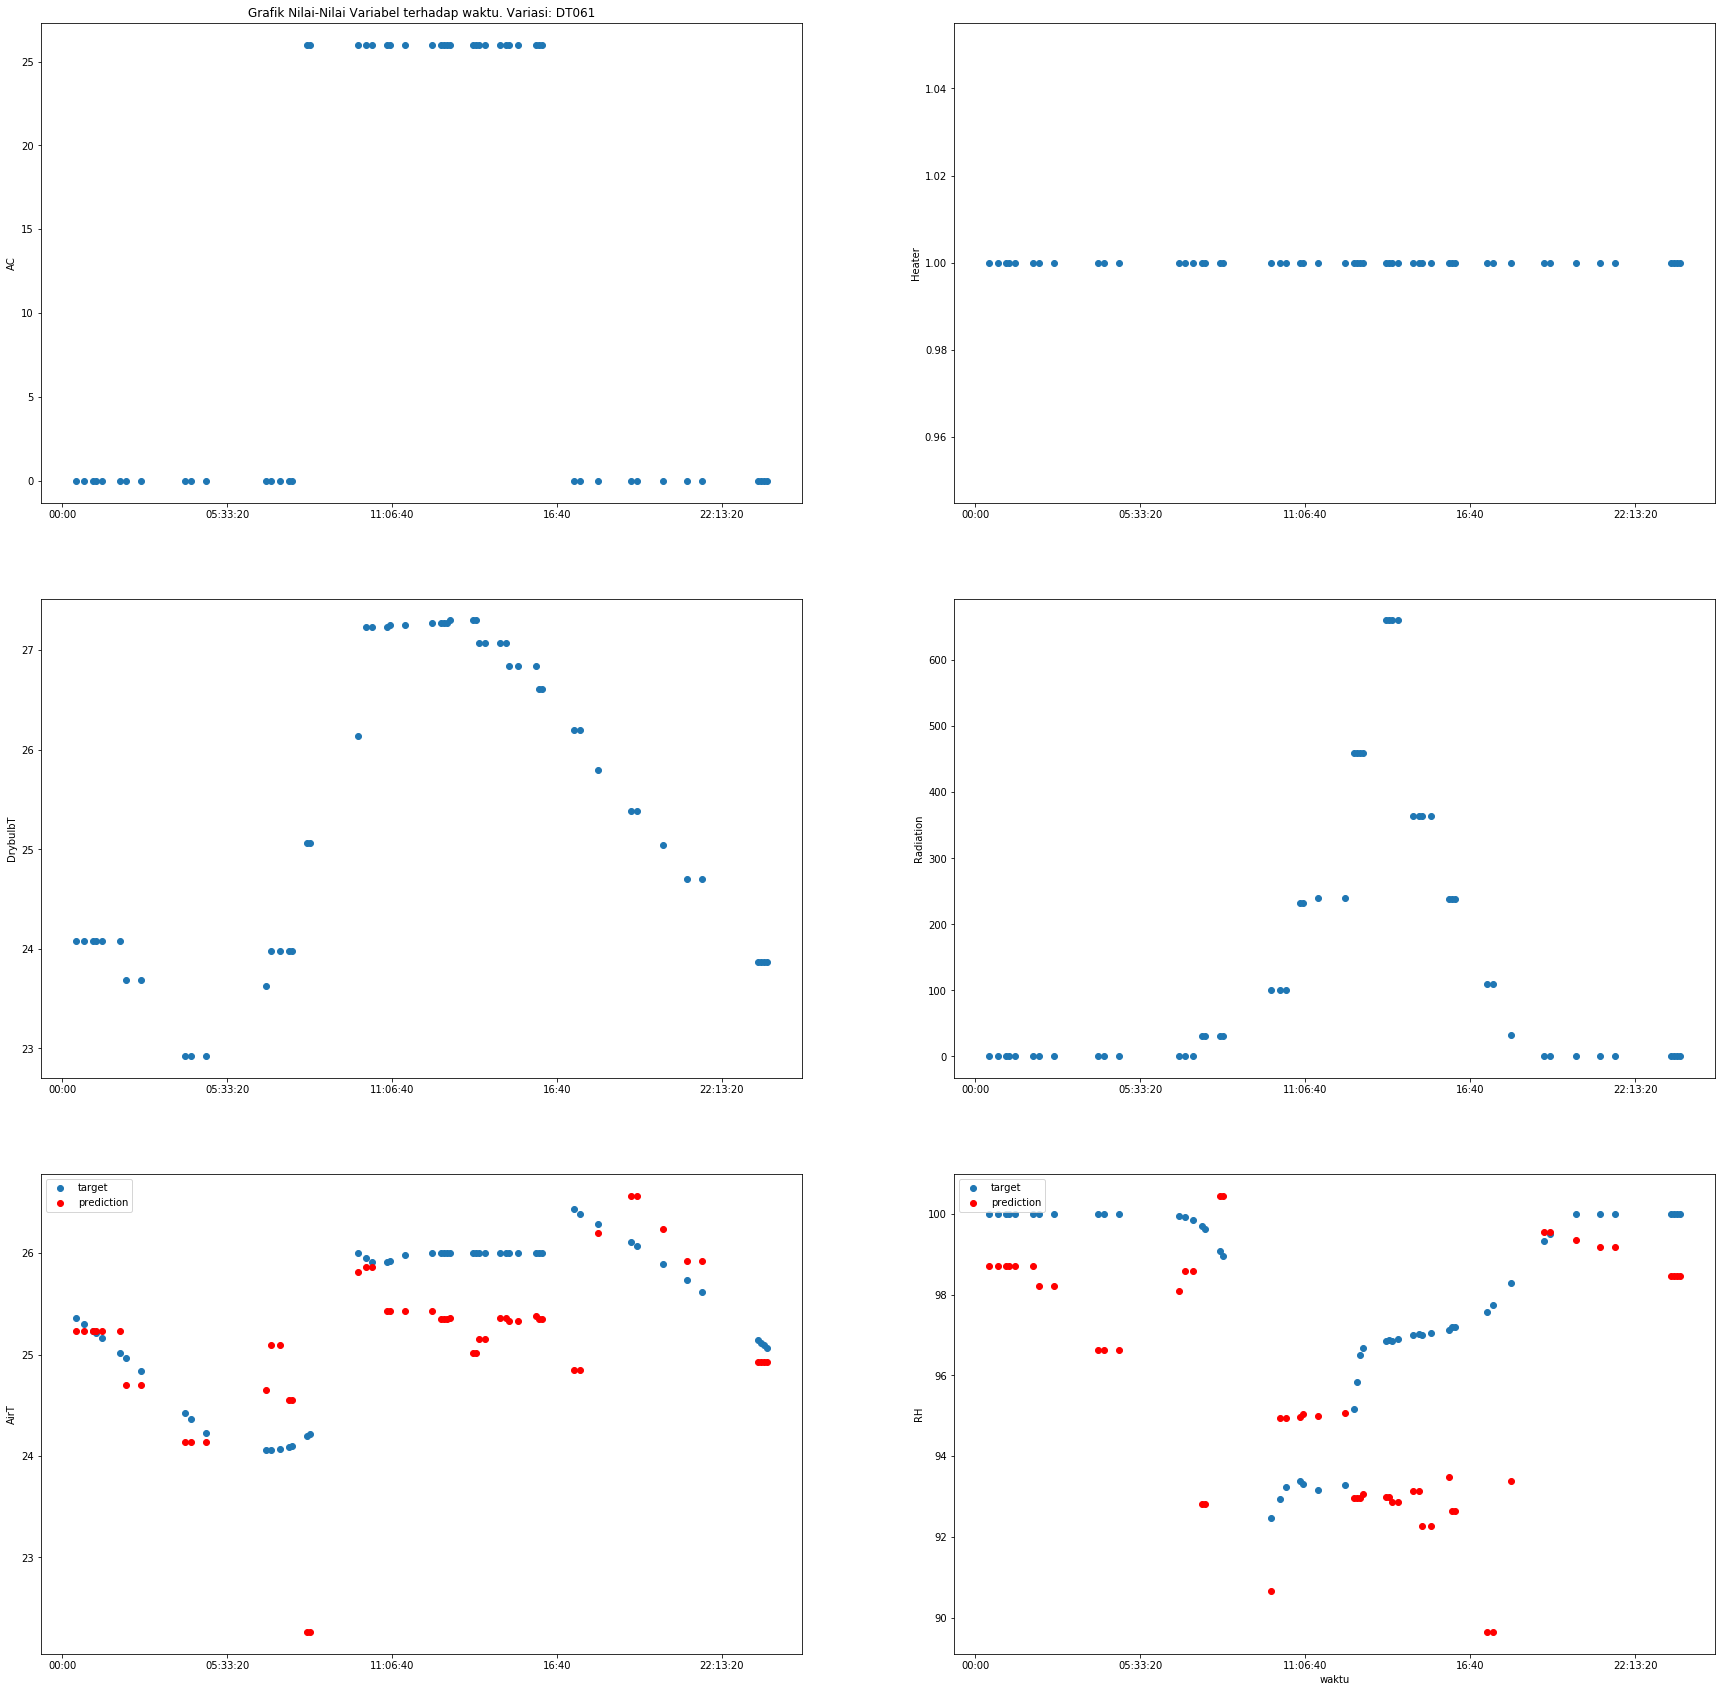

______________________________________________________________________________________________________________

Variasi: DT013


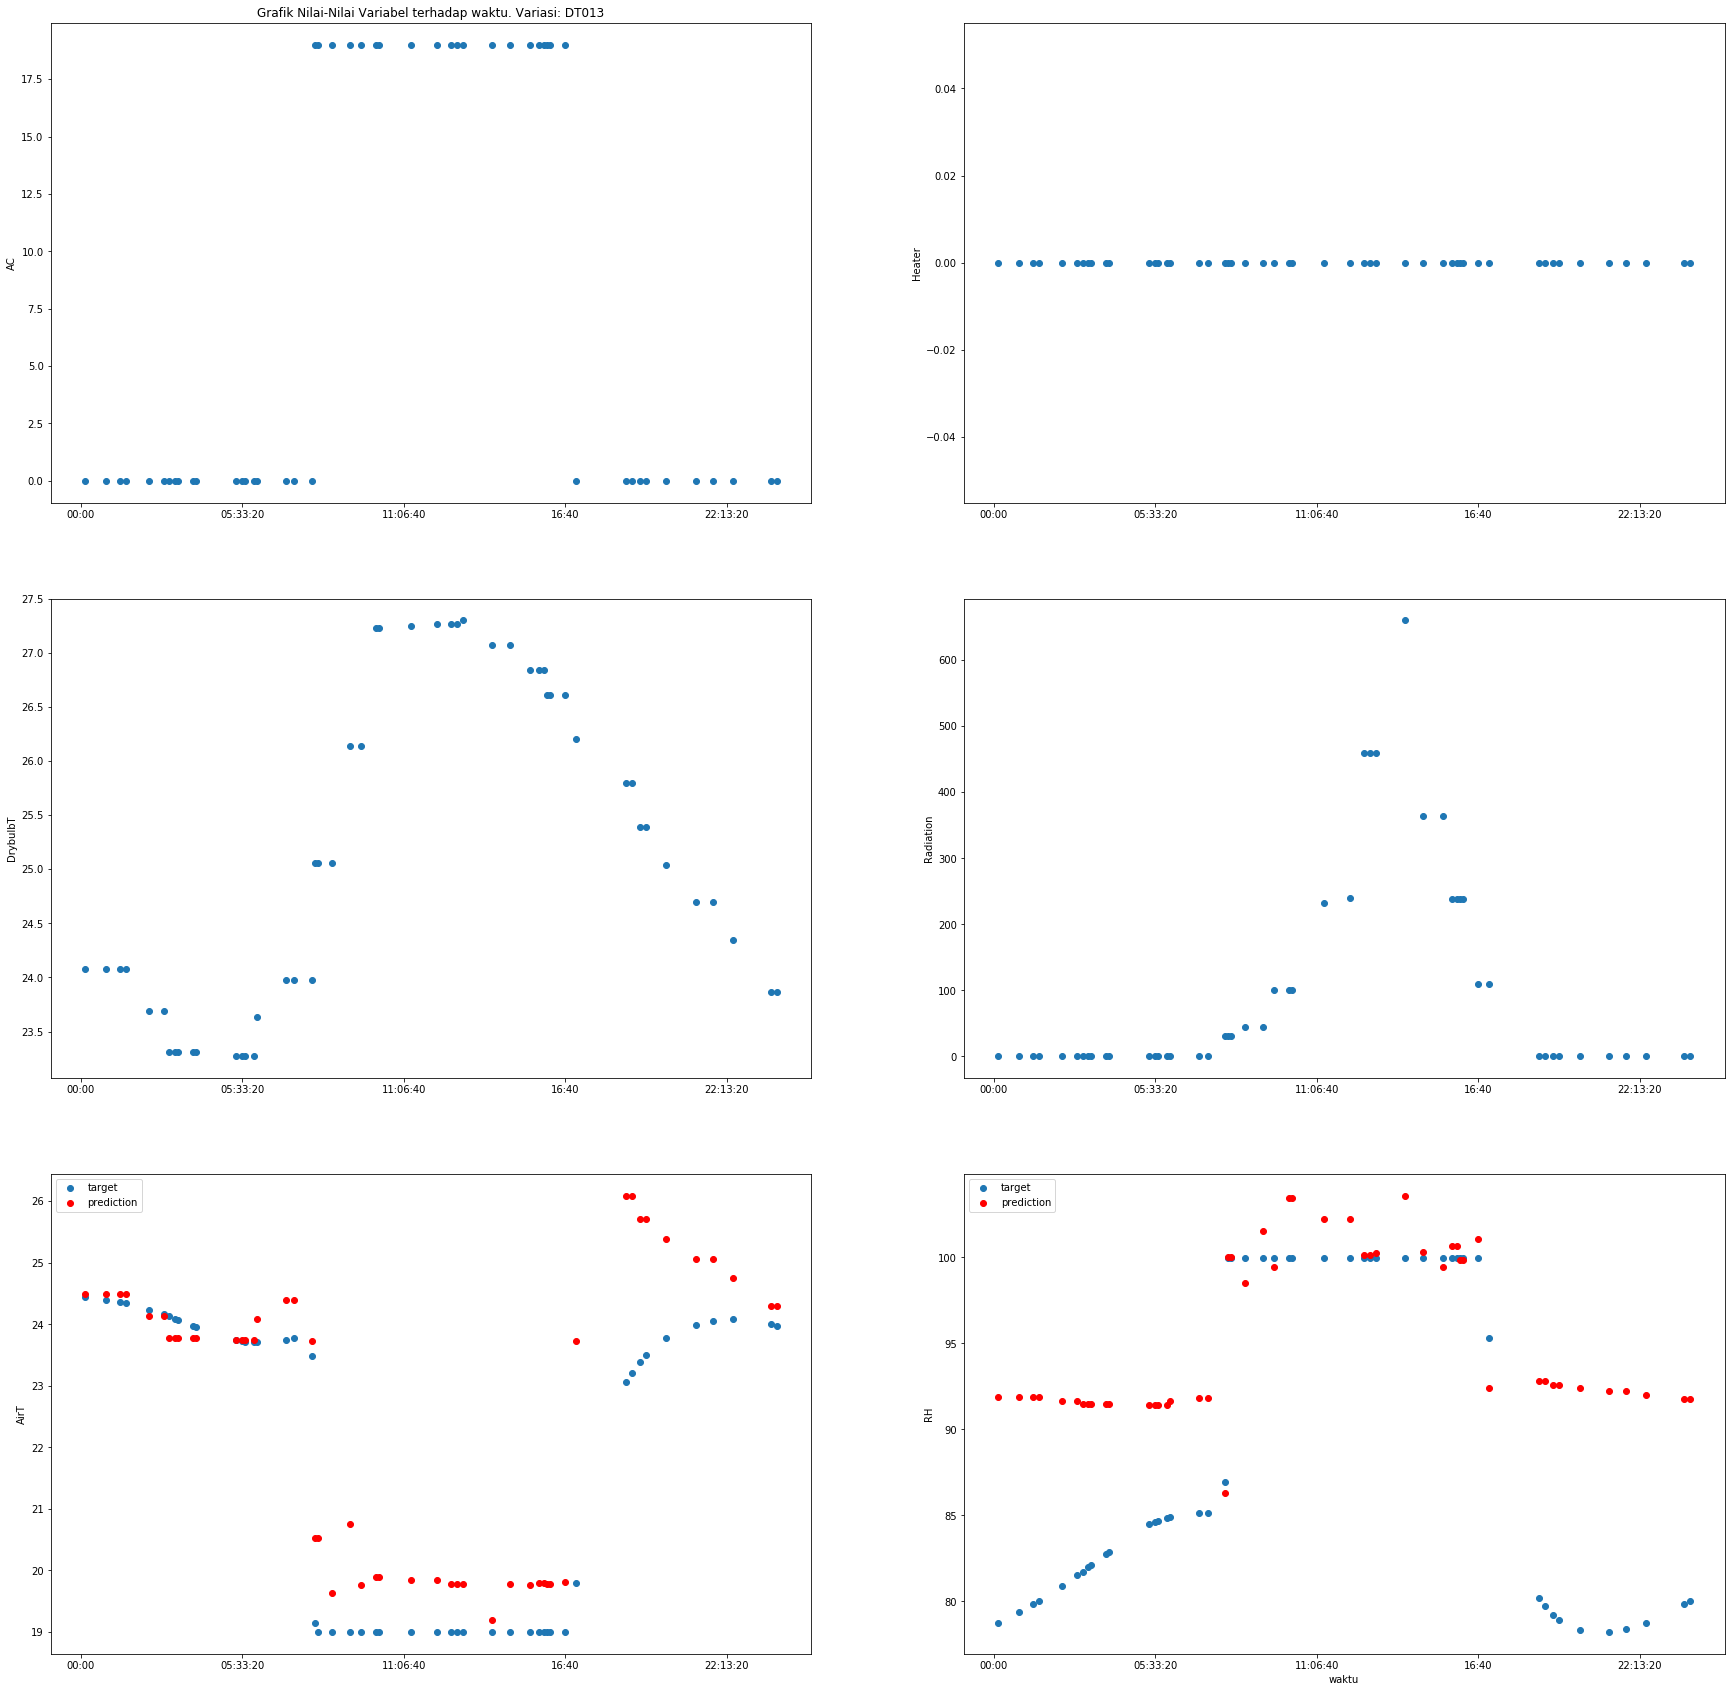

______________________________________________________________________________________________________________

Variasi: DT037


KeyboardInterrupt: 

In [49]:
for v in y_test.Variation.values:
    print('Variasi:', v)
    
    x1  = y_test.loc[y_test['Variation']==v].Time
    
    y1  = X_test.loc[y_test['Variation']==v].AC
    y2  = X_test.loc[y_test['Variation']==v].Heater
    y3  = X_test.loc[y_test['Variation']==v].DrybulbT
    y4  = X_test.loc[y_test['Variation']==v].Radiation
    y5a = y_test.loc[y_test['Variation']==v].AirT
    y5b = y_pred.loc[y_pred['Variation']==v].AirT
    y6a = y_test.loc[y_test['Variation']==v].RH
    y6b = y_pred.loc[y_pred['Variation']==v].RH
    
    plt.subplots(figsize=(30,30))
    
    plt.subplot(3,2,1)
    plt.title('Grafik Nilai-Nilai Variabel terhadap waktu. Variasi: ' + str(v))
    plt.plot(x1, y1, 'o')
    plt.xlabel(None)
    plt.ylabel('AC')
    
    plt.subplot(3,2,2)
    plt.plot(x1, y2, 'o')
    plt.xlabel(None)
    plt.ylabel('Heater')
    
    plt.subplot(3,2,3)
    plt.plot(x1, y3, 'o')
    plt.xlabel(None)
    plt.ylabel('DrybulbT')
    
    plt.subplot(3,2,4)
    plt.plot(x1, y4, 'o')
    plt.xlabel(None)
    plt.ylabel('Radiation')
    
    plt.subplot(3,2,5)
    plt.plot(x1, y5a, 'o', label='target')
    plt.plot(x1, y5b, 'ro', label='prediction')
    plt.xlabel(None)
    plt.ylabel('AirT')
    plt.legend(loc = 'upper left')
    
    plt.subplot(3,2,6)
    plt.plot(x1, y6a, 'o', label='target')
    plt.plot(x1, y6b, 'ro', label='prediction')
    plt.xlabel('waktu')
    plt.ylabel('RH')
    plt.legend(loc = 'upper left')
    
    plt.show()
    
    print('_'*110)
    print()